# Problem Statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In this dataset I've to Predict if an insurance claim is fraudulent or not.Since 'fraud_reported' is in the form of categorical String format so will use classification model

# Exploratory Data Analysis(EDA)

In [3]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 1000
Columns are 40
Shape is (1000, 40)


In [4]:
#columns of the dataframes are-
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
#numeic dataframe
df_numeric= df.select_dtypes(include='number')
df_numeric

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  _c39  
0             13020          52080       2004   NaN  
1               780           3510       2007   NaN  
2              3850          23100       2007   NaN  
3              6340          50720       2014   NaN  
4               650           4550       2009   NaN  
..              ...            ...        ...   ...  
995            8720          61040       2006   NaN  
996           18080          72320       2015   NaN  
997            7500          52500       1996   NaN  
998            5220          36540       

In [7]:
#categorical dataframe
df_categorical= df.select_dtypes(include='object')
df_categorical

policy_bind_date policy_state policy_csl insured_sex  \
0         17-10-2014           OH    250/500        MALE   
1         27-06-2006           IN    250/500        MALE   
2         06-09-2000           OH    100/300      FEMALE   
3         25-05-1990           IL    250/500      FEMALE   
4         06-06-2014           IL   500/1000        MALE   
..               ...          ...        ...         ...   
995       16-07-1991           OH   500/1000      FEMALE   
996       05-01-2014           IL    100/300      FEMALE   
997       17-02-2003           OH    250/500      FEMALE   
998       18-11-2011           IL   500/1000        MALE   
999       11-11-1996           OH    250/500      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship incident_date             incident_type  ...  \
0                husband    25-01-2015  Single Vehicle Collision  ...   
1         other-relative    21-01-2015             Vehicle Theft  ...   
2              own-child    22-02-2015   Multi-vehicle Collision  ...   
3              unmarried    10-01-2015  Single Vehicle Collision  ...   
4              unmarried    17-02-2015             Vehicle Theft  ...   
..                   ...           ...                       ...  ...   
995            unmarried    22-02-2015  Single Vehicle Collision  ...   
996                 wife    24-01-2015  Single Vehicle Collision  ...   
997       other-relative    23-01-2015   Multi-vehicle Collision  ...   
998                 wife    26-02-2015  Single Vehicle Collision  ...   
999              husband    26-02-2015                Parked Car  ...   

    incident_severity authorities_contacted incident_state incident_city  \
0        Major Damage                Police             SC      Columbus   
1        Minor Damage                Police             VA     Riverwood   
2        Minor Damage                Police             NY      Columbus   
3        Major Damage                Police             OH     Arlington   
4        Minor Damage                  None             NY     Arlington   
..                ...                   ...            ...           ...   
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location property_damage police_report_available   auto_make  \
0         9935 4th Drive             YES                     YES        Saab   
1           6608 MLK Hwy               ?                       ?    Mercedes   
2      7121 Francis Lane              NO                      NO       Dodge   
3       6956 Maple Drive               ?                      NO   Chevrolet   
4           3041 3rd Ave              NO                      NO      Accura   
..                   ...             ...                     ...         ...   
995   6045 Andromedia St             YES                       ?       Honda   
996     3092 Texas Drive             YES                    

In [8]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

In [9]:
categorical_columns 

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [10]:
len(categorical_columns)

21

In [11]:
numerical_columns


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [12]:
len(numerical_columns)

19

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
df.isnull().sum().sum()

1000

In [16]:
df.drop('_c39',axis=1,inplace=True)

In [17]:
df.shape

(1000, 39)

# Data Visualization

# 1.Countplot


The Value Counts for the attribute "age" is
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

The Countplot Diagram for the attribute "age" is
 AxesSubplot(0.125,0.125;0.775x0.755)


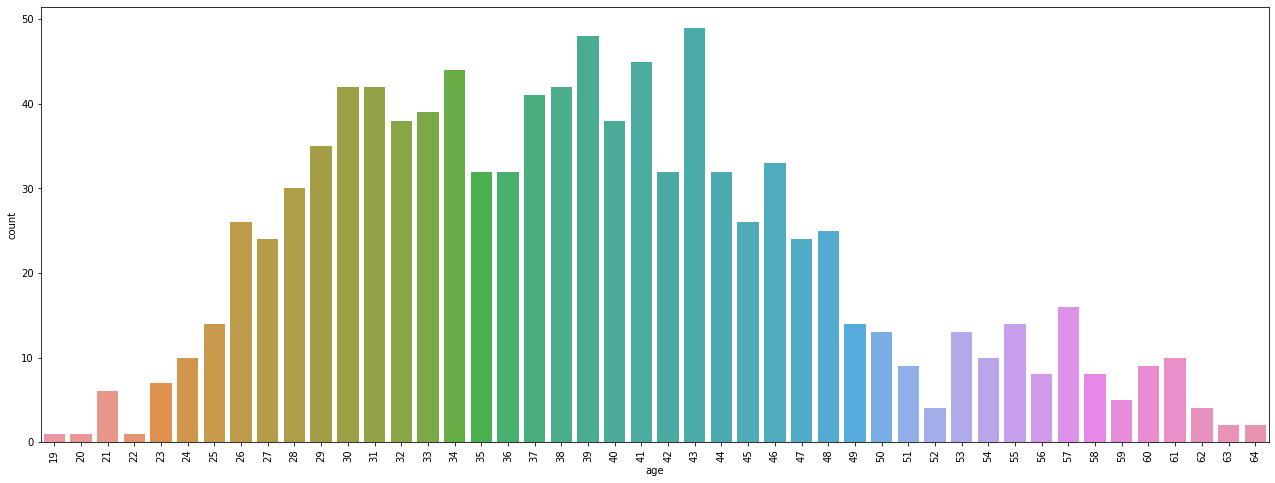



The Value Counts for the attribute "policy_state" is
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

The Countplot Diagram for the attribute "policy_state" is
 AxesSubplot(0.125,0.125;0.775x0.755)


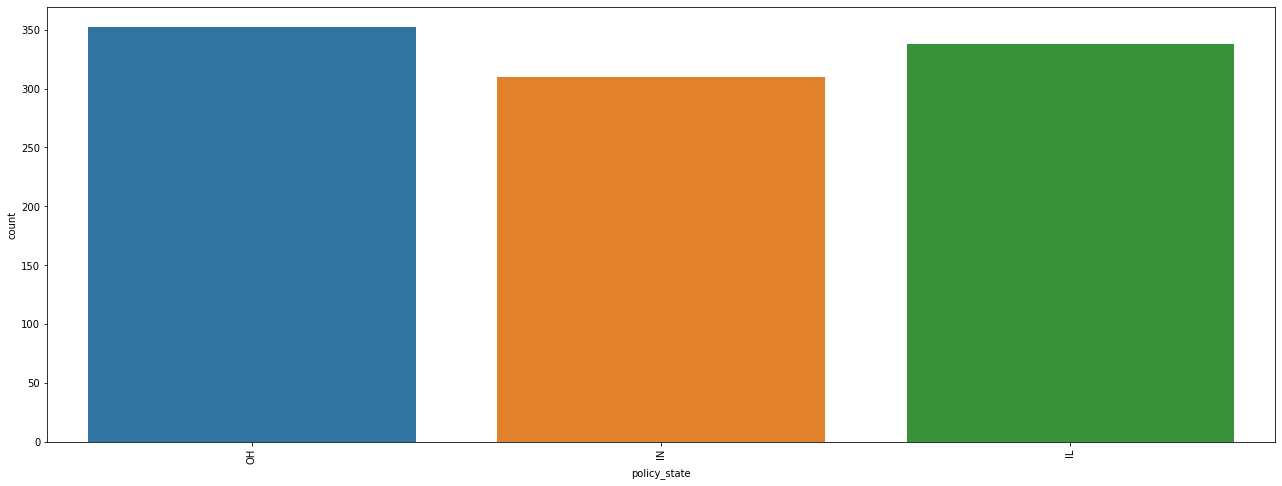



The Value Counts for the attribute "policy_csl" is
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

The Countplot Diagram for the attribute "policy_csl" is
 AxesSubplot(0.125,0.125;0.775x0.755)


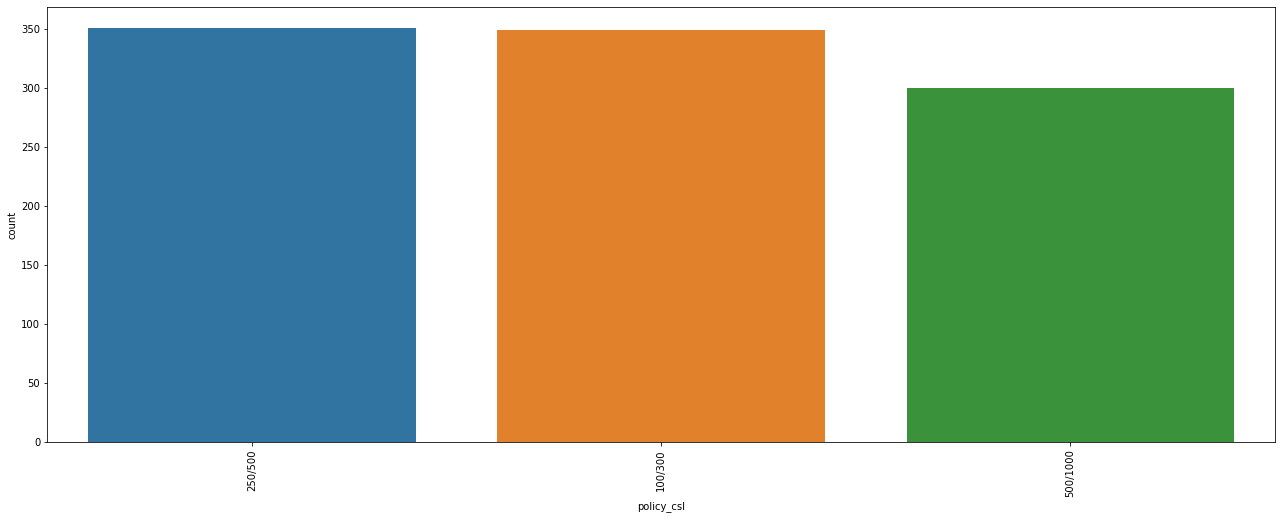



The Value Counts for the attribute "policy_deductable" is
 1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

The Countplot Diagram for the attribute "policy_deductable" is
 AxesSubplot(0.125,0.125;0.775x0.755)


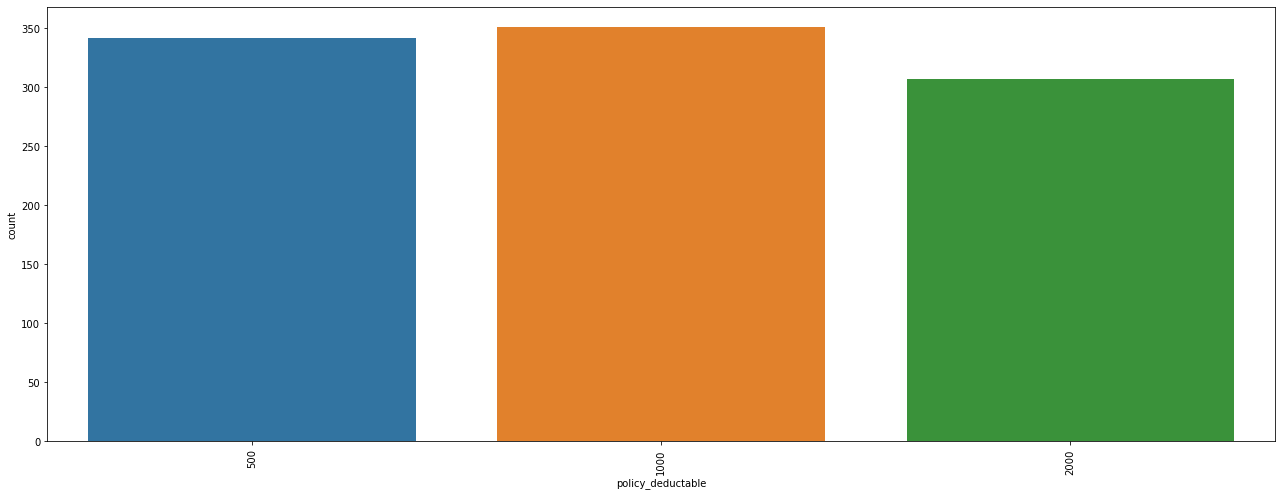



The Value Counts for the attribute "umbrella_limit" is
  0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

The Countplot Diagram for the attribute "umbrella_limit" is
 AxesSubplot(0.125,0.125;0.775x0.755)


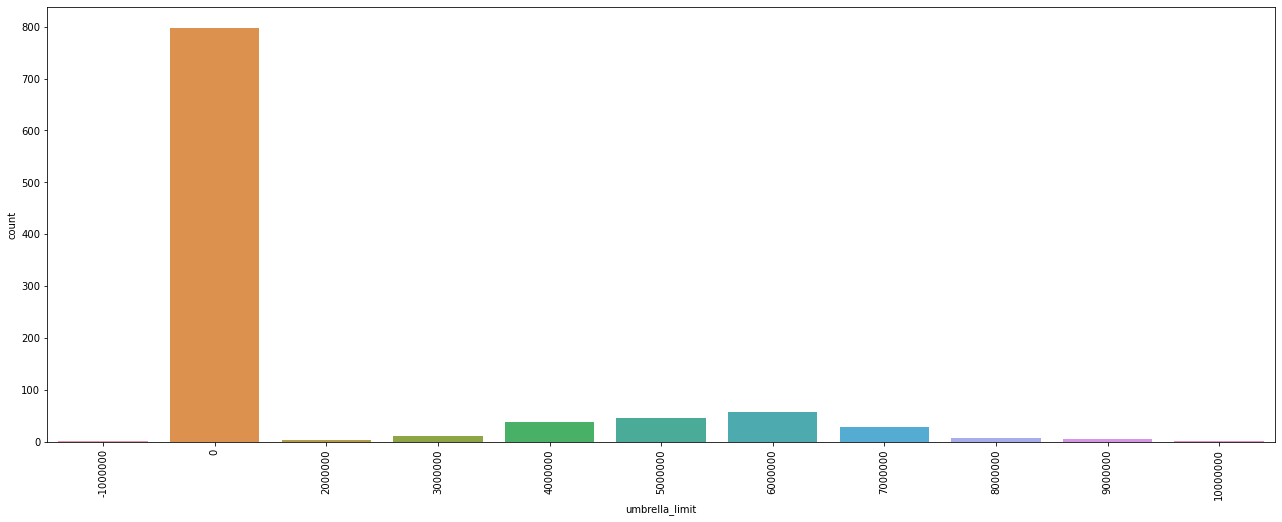



The Value Counts for the attribute "insured_sex" is
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

The Countplot Diagram for the attribute "insured_sex" is
 AxesSubplot(0.125,0.125;0.775x0.755)


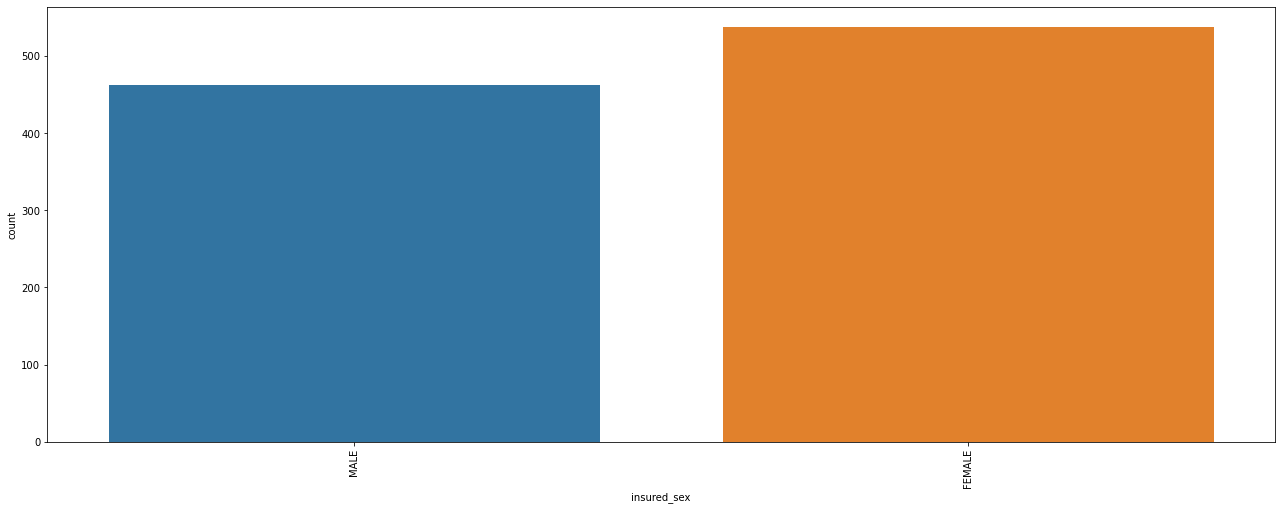



The Value Counts for the attribute "insured_education_level" is
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

The Countplot Diagram for the attribute "insured_education_level" is
 AxesSubplot(0.125,0.125;0.775x0.755)


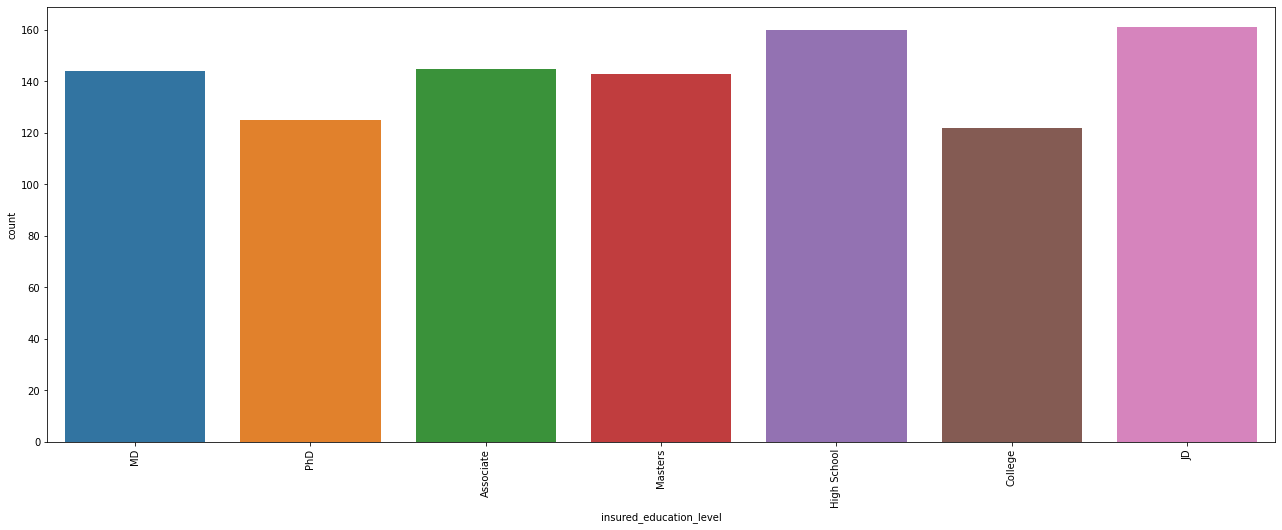



The Value Counts for the attribute "insured_occupation" is
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

The Countplot Diagram for the attribute "insured_occupation" is
 AxesSubplot(0.125,0.125;0.775x0.755)


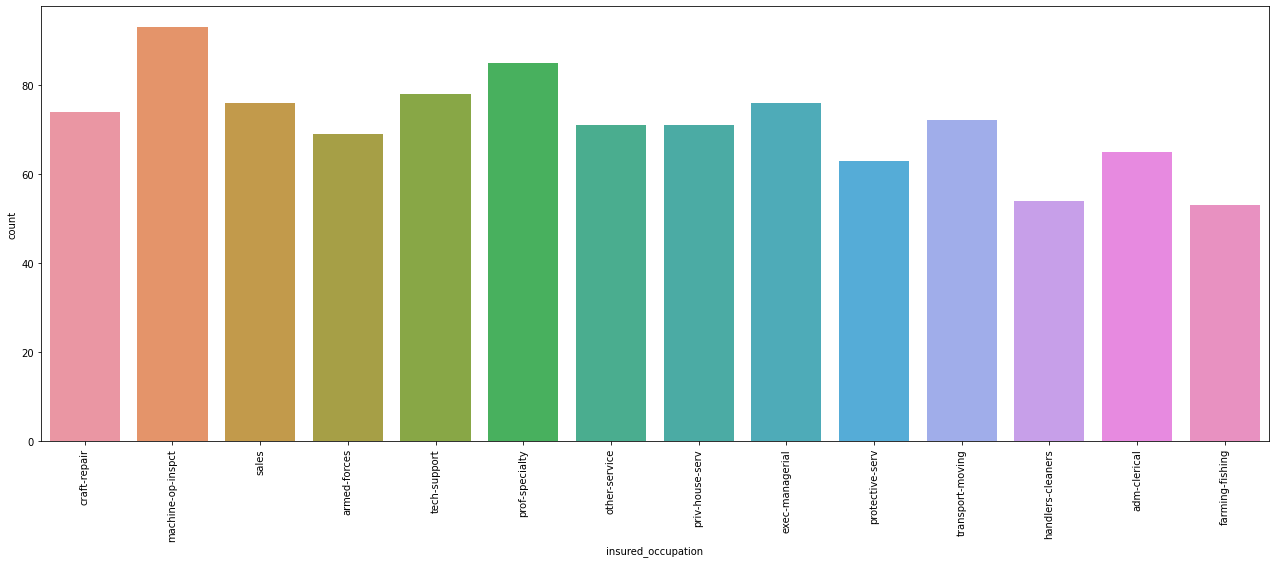



The Value Counts for the attribute "insured_hobbies" is
 reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

The Countplot Diagram for the attribute "insured_hobbies" is
 AxesSubplot(0.125,0.125;0.775x0.755)


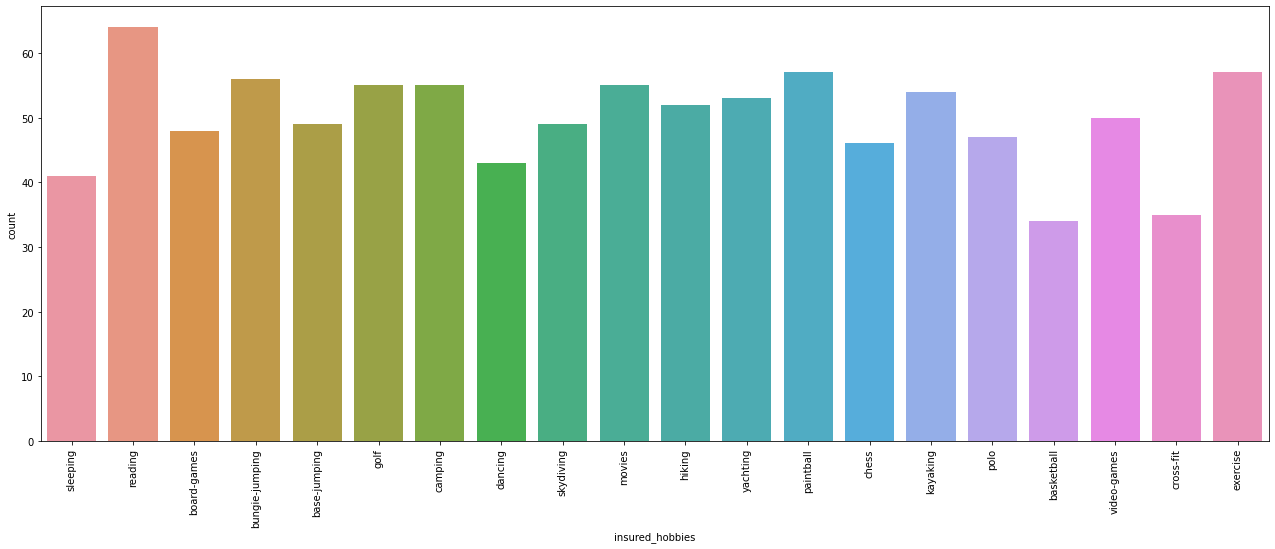



The Value Counts for the attribute "insured_relationship" is
 own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

The Countplot Diagram for the attribute "insured_relationship" is
 AxesSubplot(0.125,0.125;0.775x0.755)


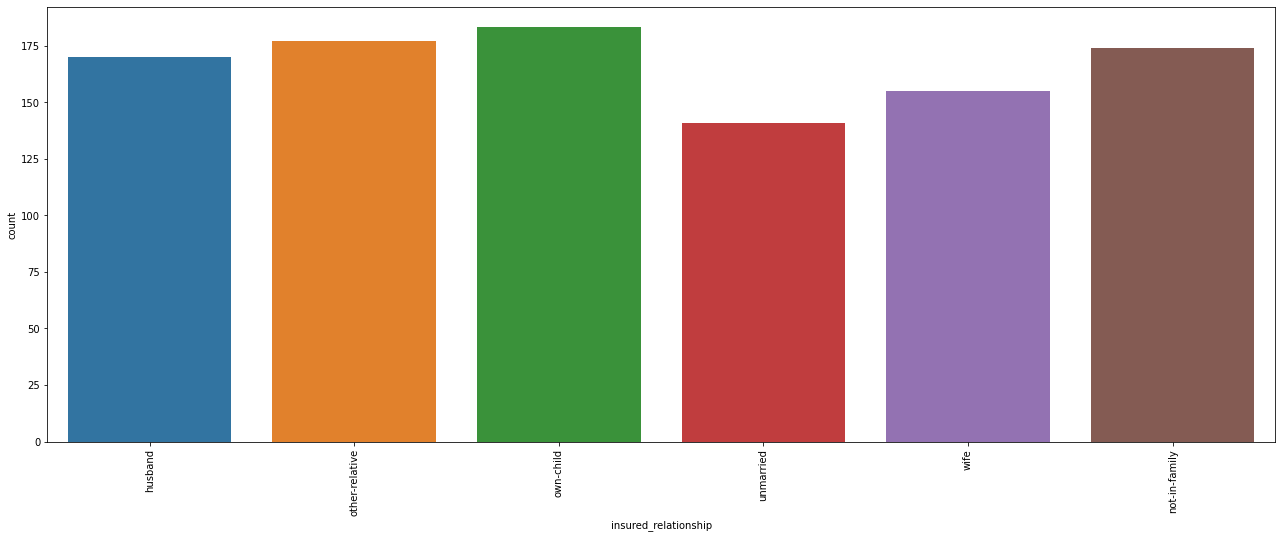



The Value Counts for the attribute "incident_date" is
 02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-20

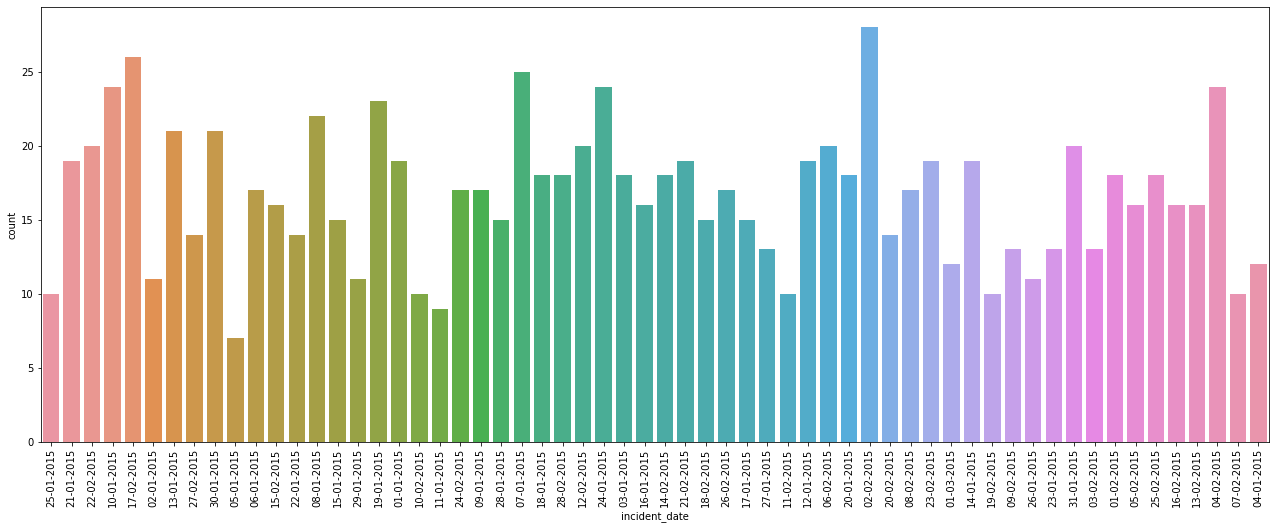



The Value Counts for the attribute "incident_type" is
 Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

The Countplot Diagram for the attribute "incident_type" is
 AxesSubplot(0.125,0.125;0.775x0.755)


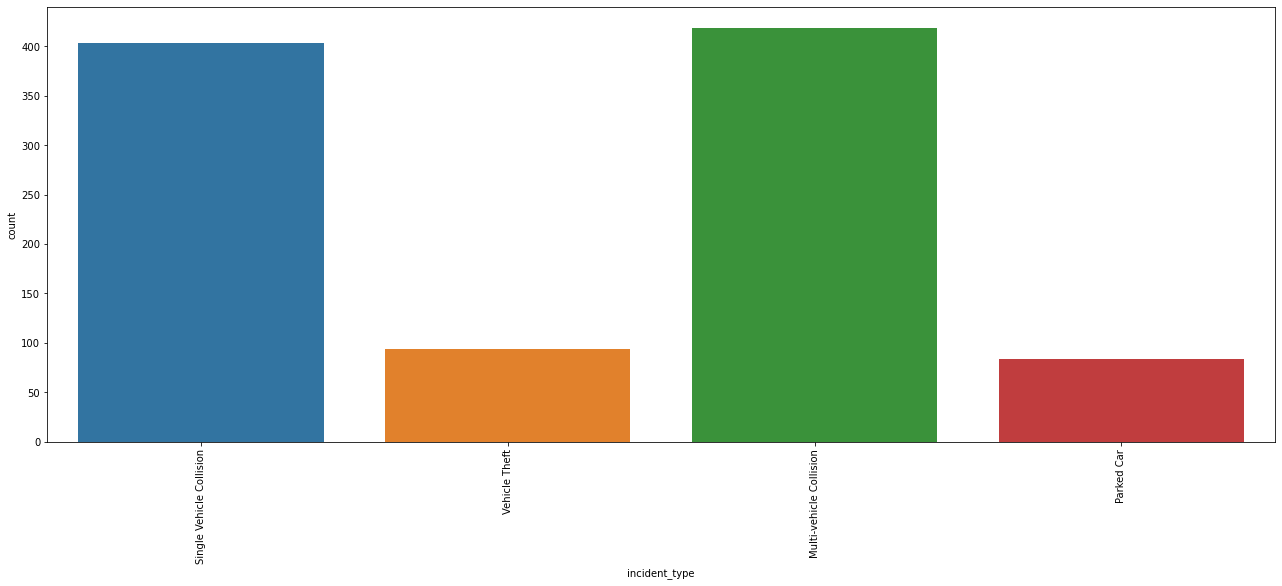



The Value Counts for the attribute "collision_type" is
 Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

The Countplot Diagram for the attribute "collision_type" is
 AxesSubplot(0.125,0.125;0.775x0.755)


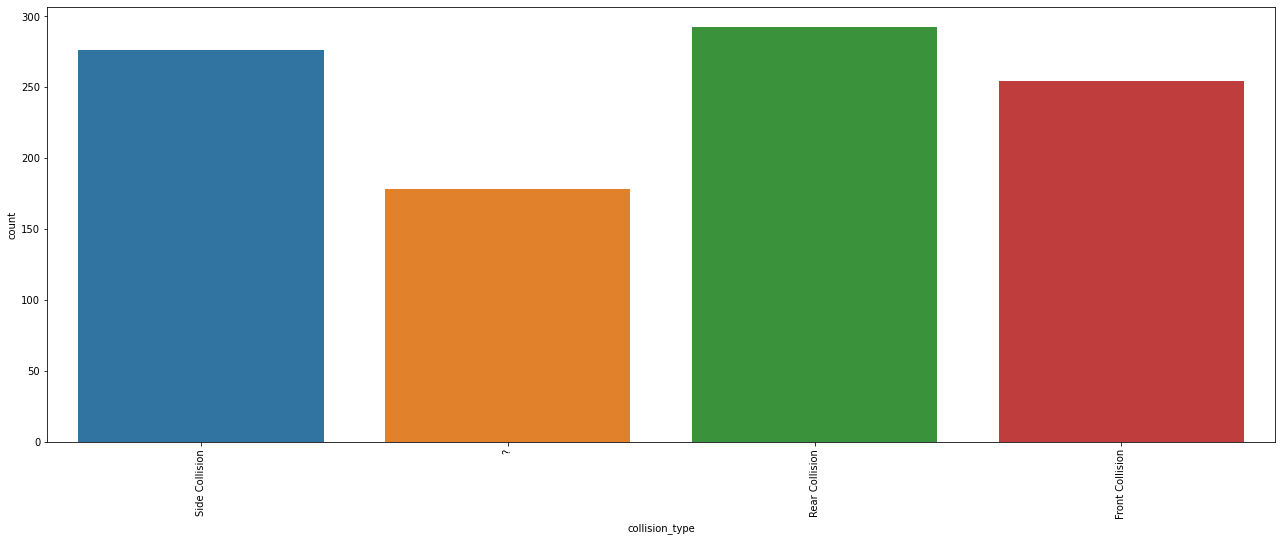



The Value Counts for the attribute "incident_severity" is
 Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

The Countplot Diagram for the attribute "incident_severity" is
 AxesSubplot(0.125,0.125;0.775x0.755)


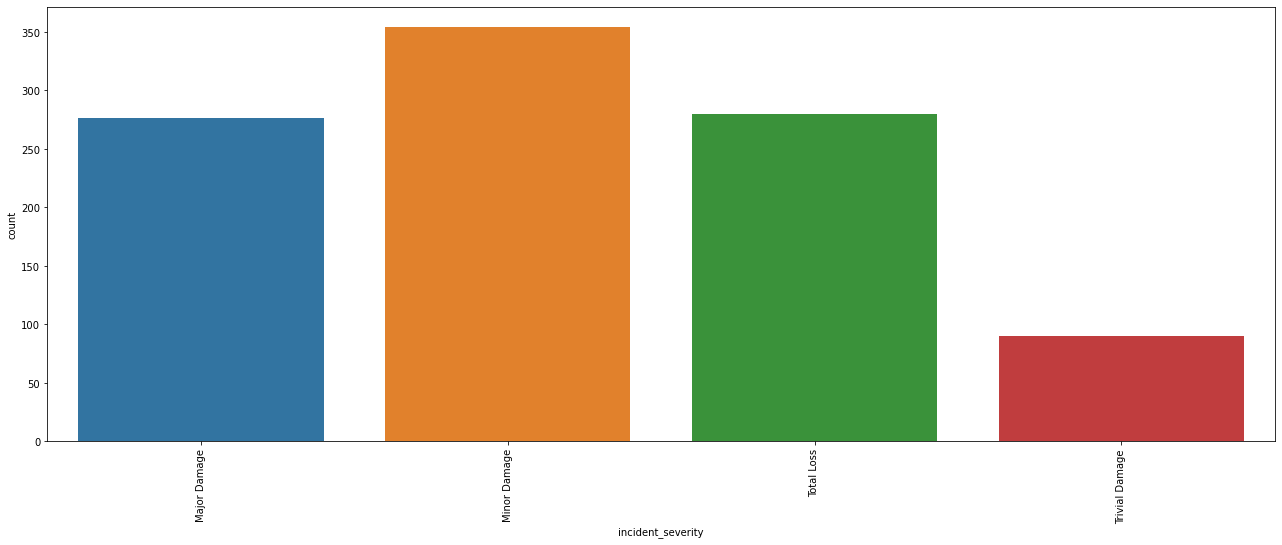



The Value Counts for the attribute "authorities_contacted" is
 Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

The Countplot Diagram for the attribute "authorities_contacted" is
 AxesSubplot(0.125,0.125;0.775x0.755)


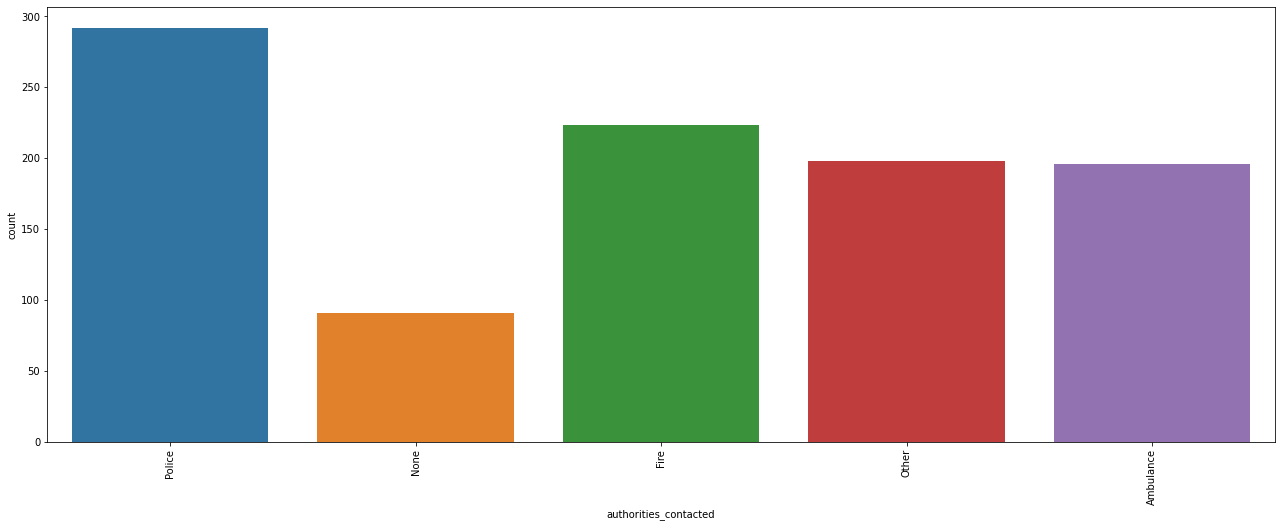



The Value Counts for the attribute "incident_state" is
 NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

The Countplot Diagram for the attribute "incident_state" is
 AxesSubplot(0.125,0.125;0.775x0.755)


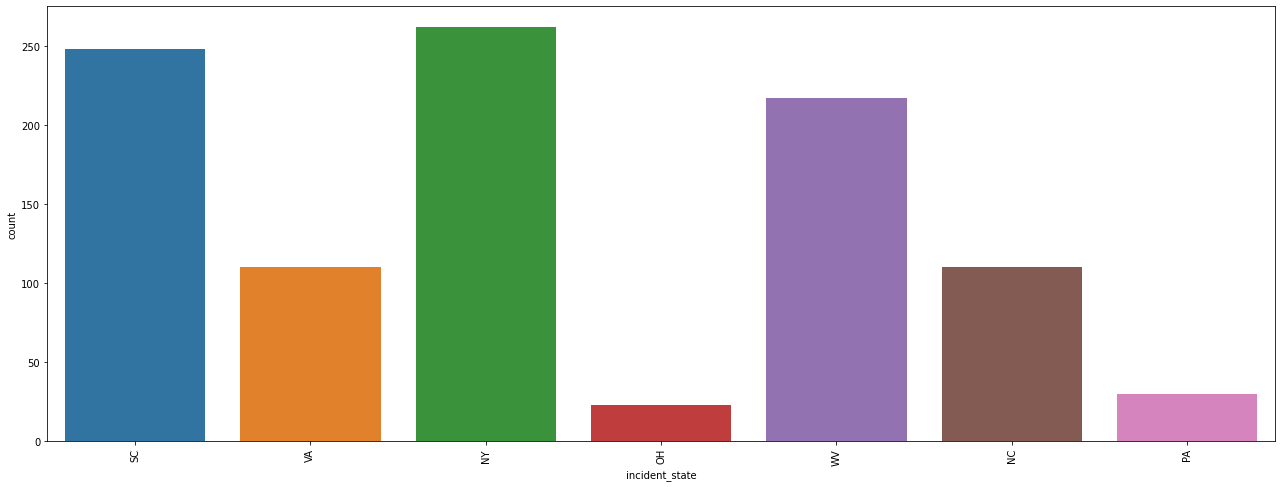



The Value Counts for the attribute "incident_city" is
 Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

The Countplot Diagram for the attribute "incident_city" is
 AxesSubplot(0.125,0.125;0.775x0.755)


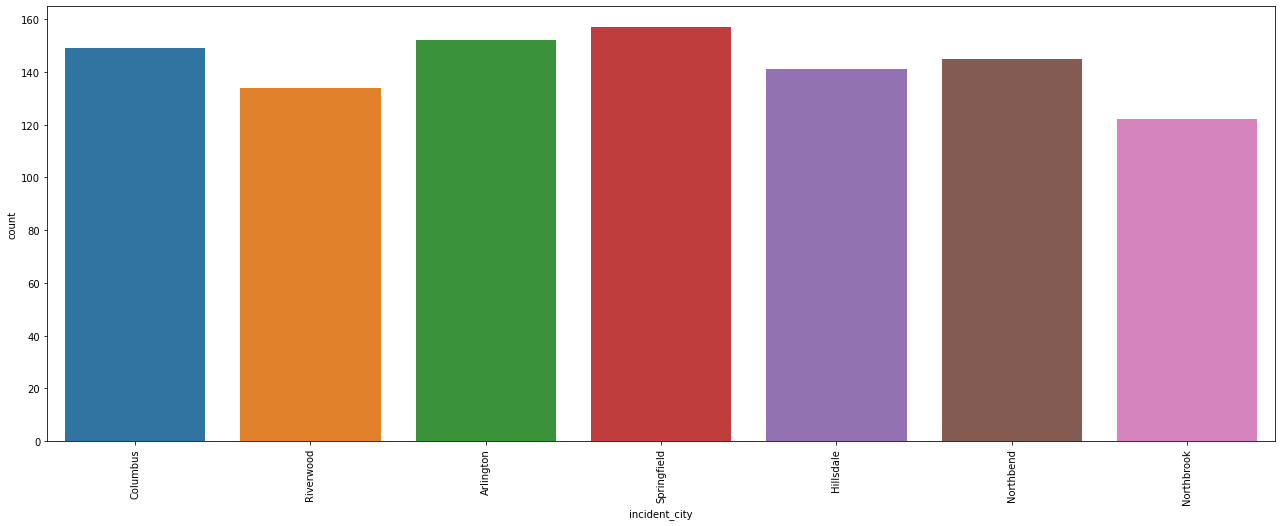



The Value Counts for the attribute "incident_hour_of_the_day" is
 17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

The Countplot Diagram for the attribute "incident_hour_of_the_day" is
 AxesSubplot(0.125,0.125;0.775x0.755)


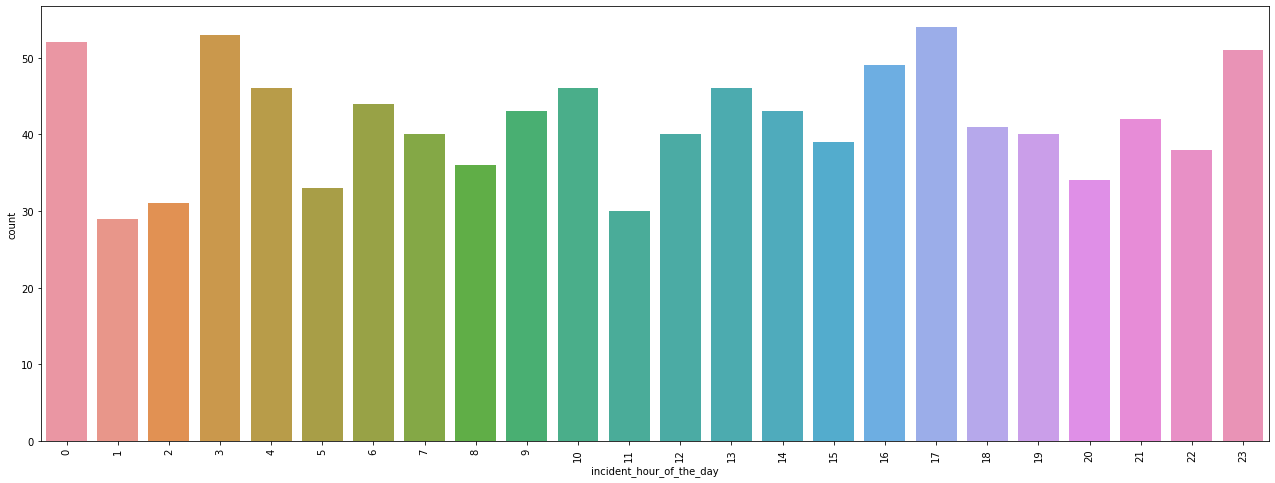



The Value Counts for the attribute "number_of_vehicles_involved" is
 1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

The Countplot Diagram for the attribute "number_of_vehicles_involved" is
 AxesSubplot(0.125,0.125;0.775x0.755)


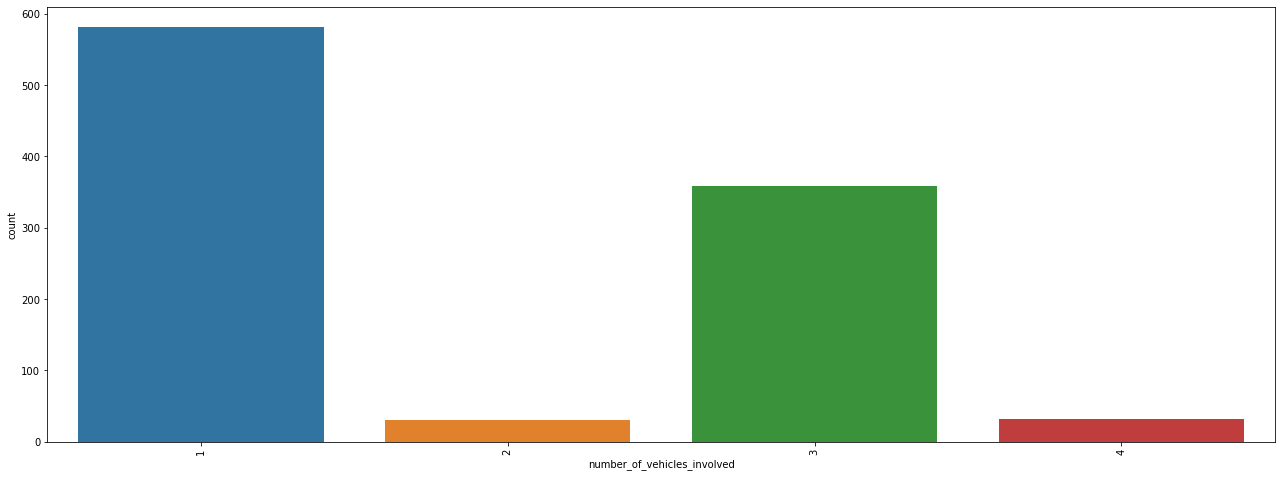



The Value Counts for the attribute "property_damage" is
 ?      360
NO     338
YES    302
Name: property_damage, dtype: int64

The Countplot Diagram for the attribute "property_damage" is
 AxesSubplot(0.125,0.125;0.775x0.755)


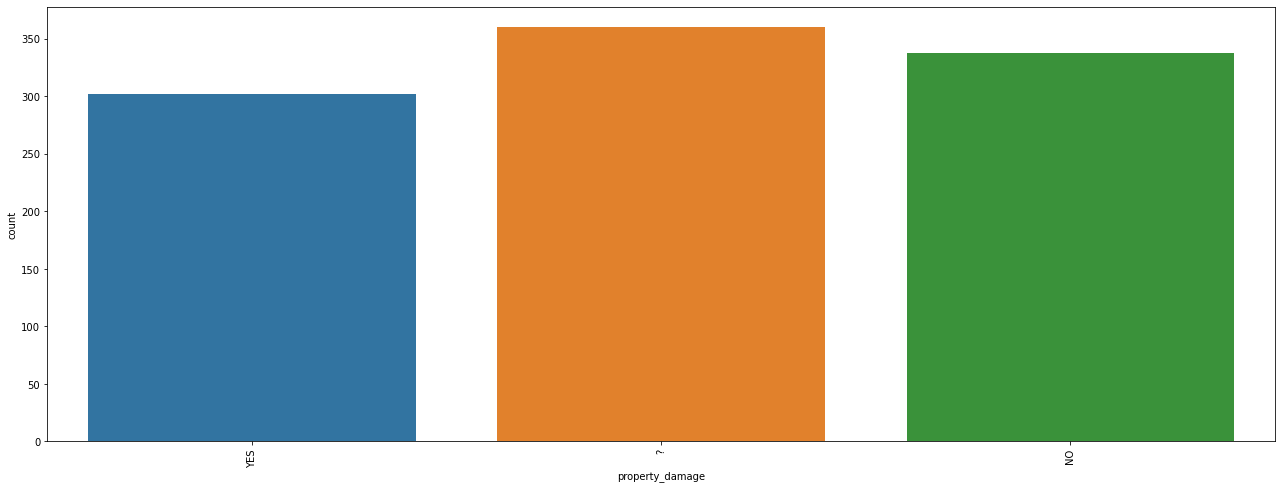



The Value Counts for the attribute "bodily_injuries" is
 0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

The Countplot Diagram for the attribute "bodily_injuries" is
 AxesSubplot(0.125,0.125;0.775x0.755)


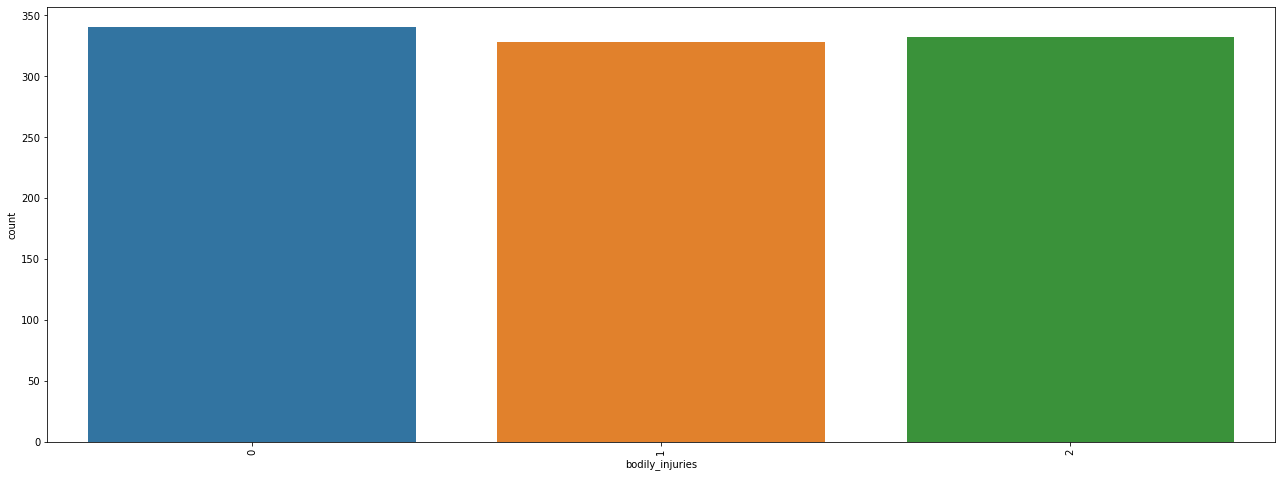



The Value Counts for the attribute "witnesses" is
 1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

The Countplot Diagram for the attribute "witnesses" is
 AxesSubplot(0.125,0.125;0.775x0.755)


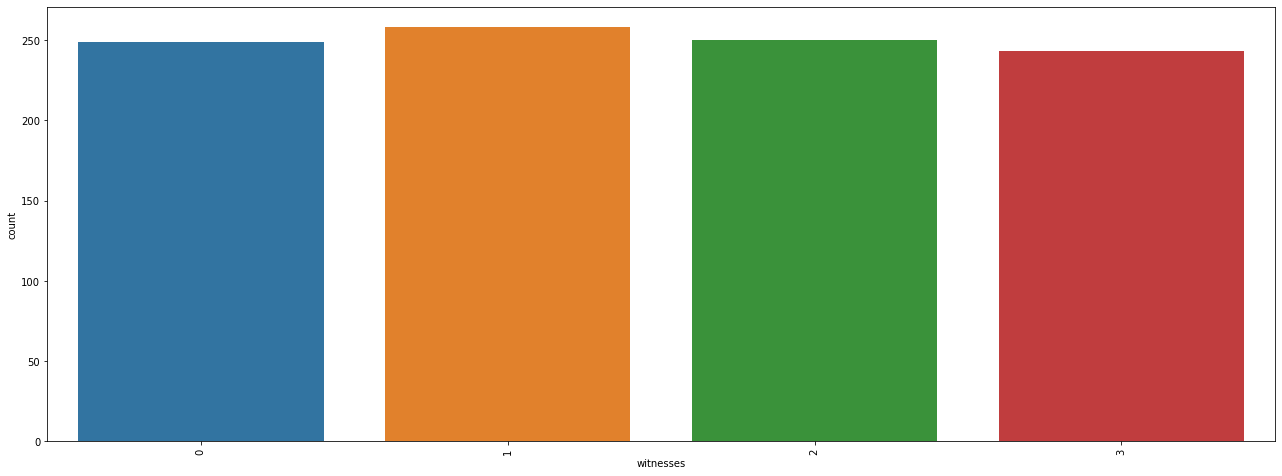



The Value Counts for the attribute "police_report_available" is
 ?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

The Countplot Diagram for the attribute "police_report_available" is
 AxesSubplot(0.125,0.125;0.775x0.755)


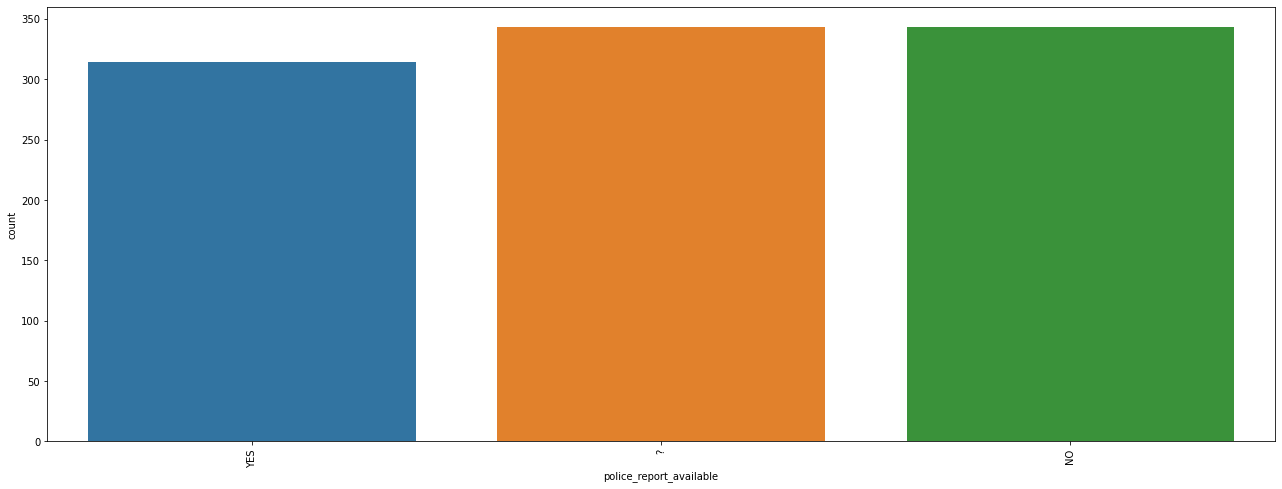



The Value Counts for the attribute "auto_make" is
 Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

The Countplot Diagram for the attribute "auto_make" is
 AxesSubplot(0.125,0.125;0.775x0.755)


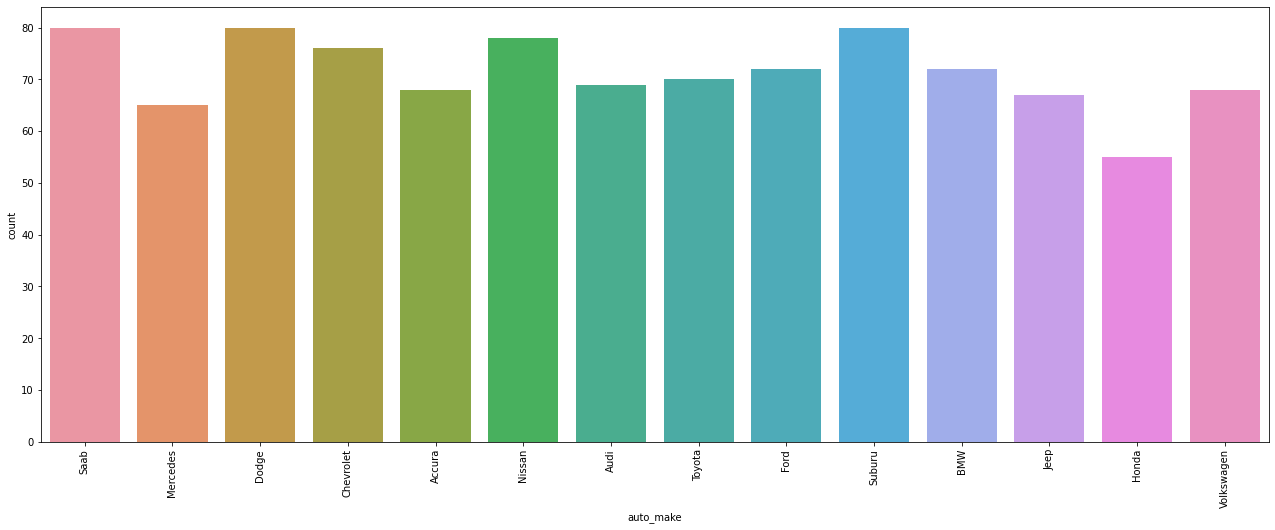



The Value Counts for the attribute "auto_model" is
 RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

The Countplot Diagram for the attribute "auto_model" is
 AxesSubplot(0.125,0.125;0.775x0.755)


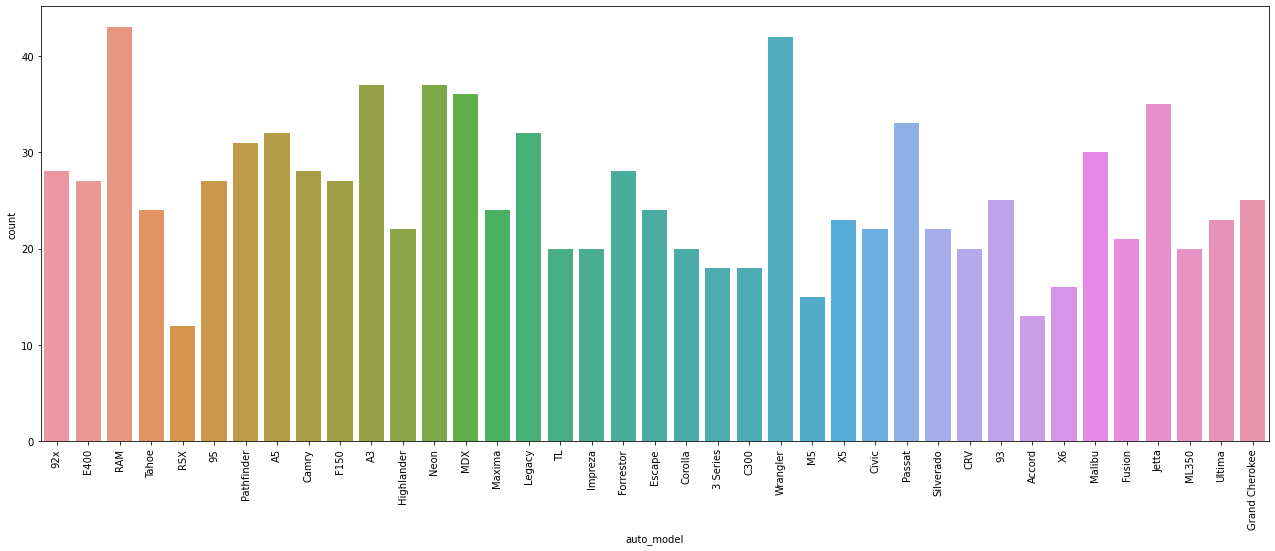



The Value Counts for the attribute "auto_year" is
 1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

The Countplot Diagram for the attribute "auto_year" is
 AxesSubplot(0.125,0.125;0.775x0.755)


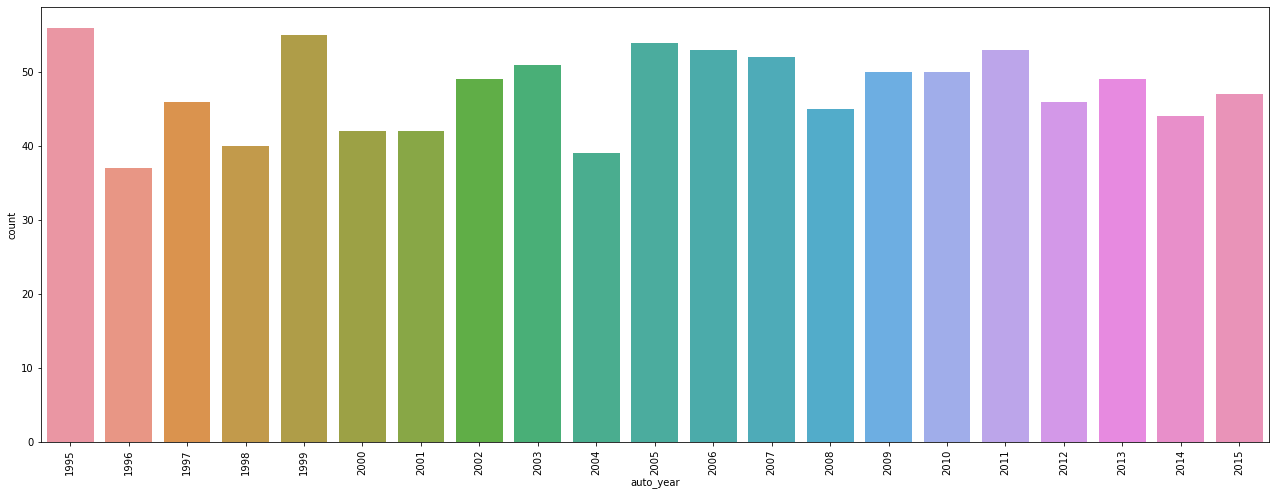



The Value Counts for the attribute "fraud_reported" is
 N    753
Y    247
Name: fraud_reported, dtype: int64

The Countplot Diagram for the attribute "fraud_reported" is
 AxesSubplot(0.125,0.125;0.775x0.755)


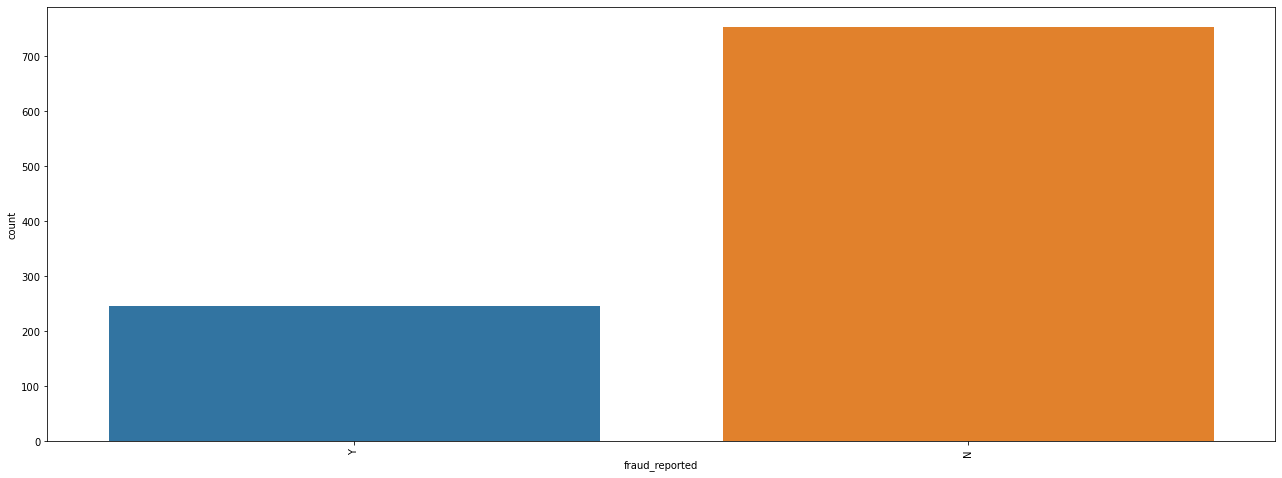

In [18]:
for i in df.columns.drop(['months_as_customer','policy_number','policy_bind_date','policy_annual_premium','insured_zip','capital-gains','capital-loss','incident_location','total_claim_amount','injury_claim','property_claim','vehicle_claim']):
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    plt.figure(figsize=(22,8))
    print(f'\nThe Countplot Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

1.Most of the Policy are on hold.

2.537 female are insured under the policy

3.Most of the incidents are happening in the city Springfield.

4.For 343 cases police reports are not available

5.In 753 cases there are no fraud happend

# 2.Histogram


The Histogram Diagram for the attribute "age" is
 AxesSubplot(0.125,0.125;0.775x0.755)


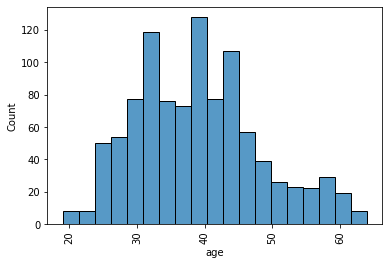




The Histogram Diagram for the attribute "policy_state" is
 AxesSubplot(0.125,0.125;0.775x0.755)


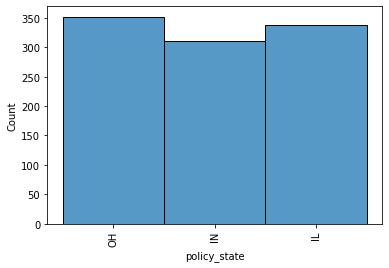




The Histogram Diagram for the attribute "policy_csl" is
 AxesSubplot(0.125,0.125;0.775x0.755)


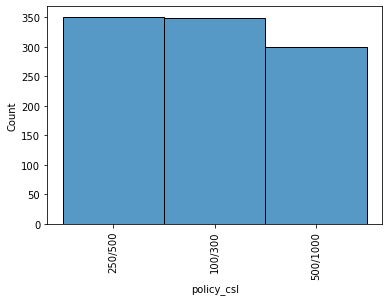




The Histogram Diagram for the attribute "policy_deductable" is
 AxesSubplot(0.125,0.125;0.775x0.755)


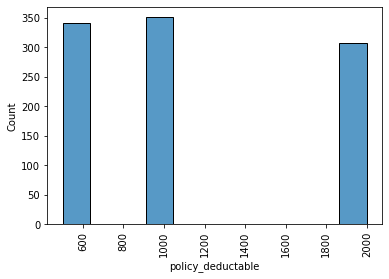




The Histogram Diagram for the attribute "umbrella_limit" is
 AxesSubplot(0.125,0.125;0.775x0.755)


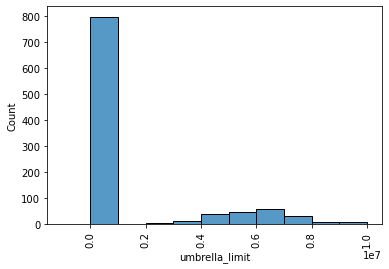




The Histogram Diagram for the attribute "insured_sex" is
 AxesSubplot(0.125,0.125;0.775x0.755)


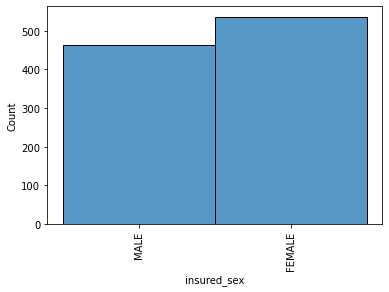




The Histogram Diagram for the attribute "insured_education_level" is
 AxesSubplot(0.125,0.125;0.775x0.755)


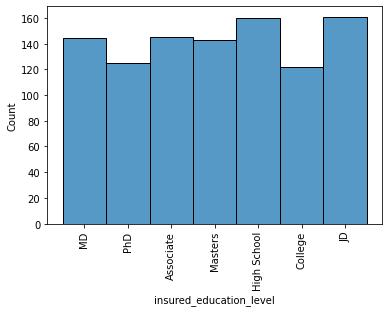




The Histogram Diagram for the attribute "insured_occupation" is
 AxesSubplot(0.125,0.125;0.775x0.755)


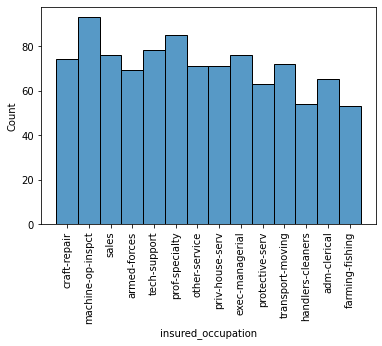




The Histogram Diagram for the attribute "insured_hobbies" is
 AxesSubplot(0.125,0.125;0.775x0.755)


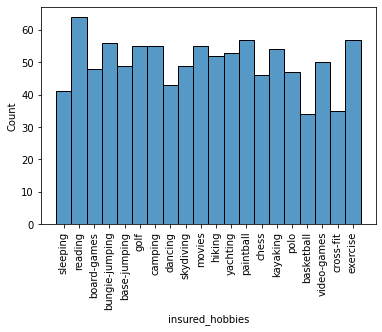




The Histogram Diagram for the attribute "insured_relationship" is
 AxesSubplot(0.125,0.125;0.775x0.755)


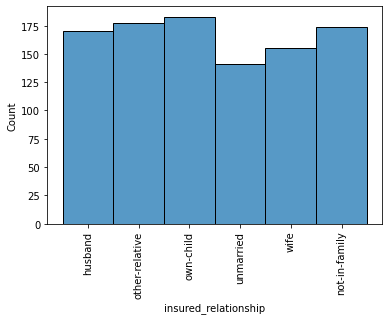




The Histogram Diagram for the attribute "incident_date" is
 AxesSubplot(0.125,0.125;0.775x0.755)


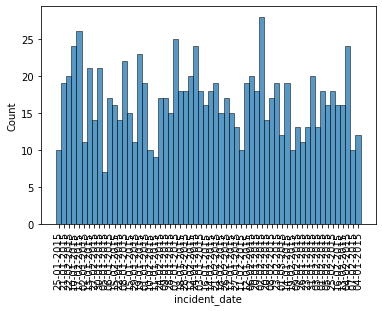




The Histogram Diagram for the attribute "incident_type" is
 AxesSubplot(0.125,0.125;0.775x0.755)


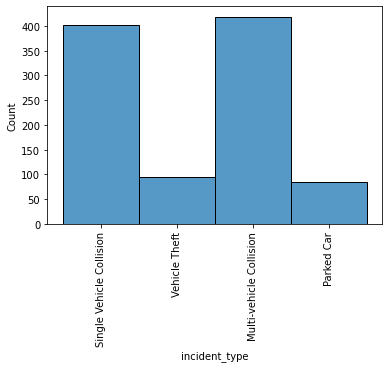




The Histogram Diagram for the attribute "collision_type" is
 AxesSubplot(0.125,0.125;0.775x0.755)


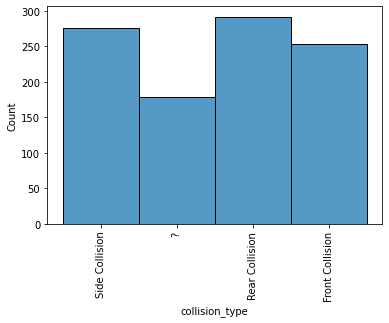




The Histogram Diagram for the attribute "incident_severity" is
 AxesSubplot(0.125,0.125;0.775x0.755)


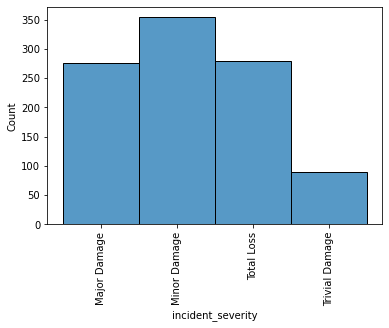




The Histogram Diagram for the attribute "authorities_contacted" is
 AxesSubplot(0.125,0.125;0.775x0.755)


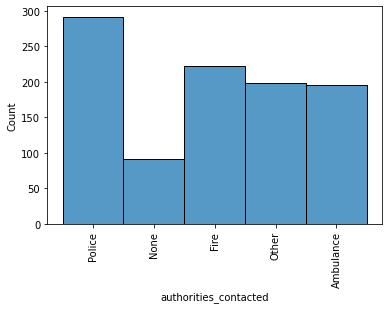




The Histogram Diagram for the attribute "incident_state" is
 AxesSubplot(0.125,0.125;0.775x0.755)


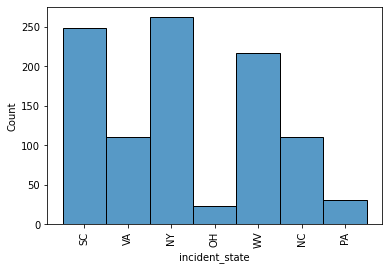




The Histogram Diagram for the attribute "incident_city" is
 AxesSubplot(0.125,0.125;0.775x0.755)


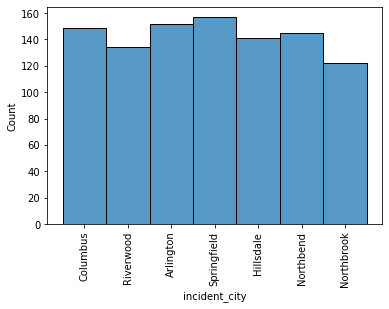




The Histogram Diagram for the attribute "incident_hour_of_the_day" is
 AxesSubplot(0.125,0.125;0.775x0.755)


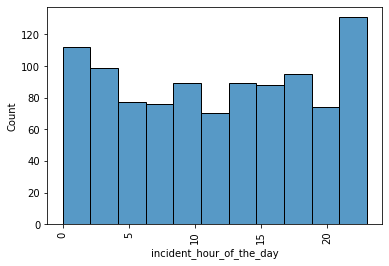




The Histogram Diagram for the attribute "number_of_vehicles_involved" is
 AxesSubplot(0.125,0.125;0.775x0.755)


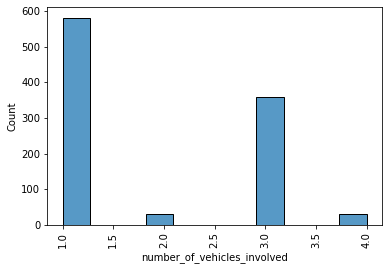




The Histogram Diagram for the attribute "property_damage" is
 AxesSubplot(0.125,0.125;0.775x0.755)


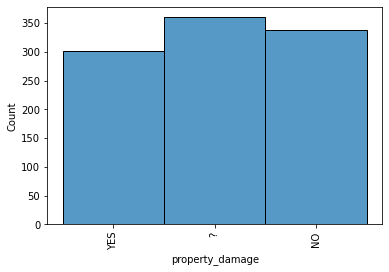




The Histogram Diagram for the attribute "bodily_injuries" is
 AxesSubplot(0.125,0.125;0.775x0.755)


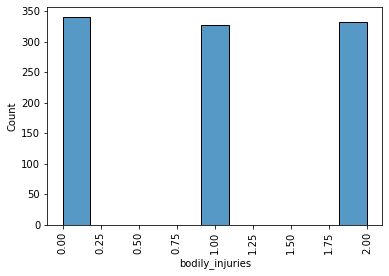




The Histogram Diagram for the attribute "witnesses" is
 AxesSubplot(0.125,0.125;0.775x0.755)


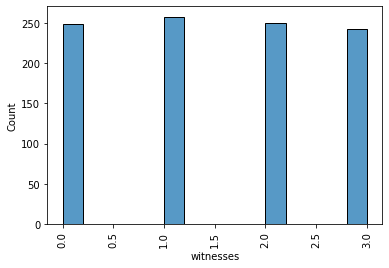




The Histogram Diagram for the attribute "police_report_available" is
 AxesSubplot(0.125,0.125;0.775x0.755)


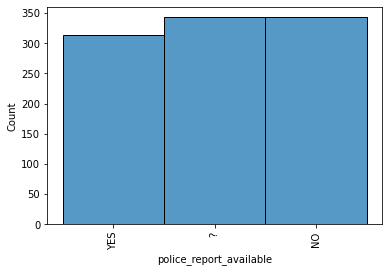




The Histogram Diagram for the attribute "auto_make" is
 AxesSubplot(0.125,0.125;0.775x0.755)


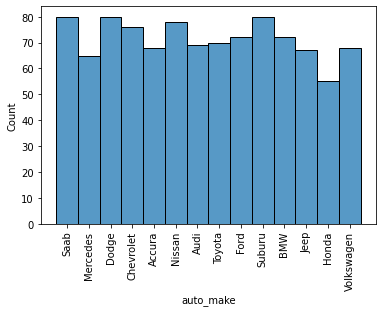




The Histogram Diagram for the attribute "auto_model" is
 AxesSubplot(0.125,0.125;0.775x0.755)


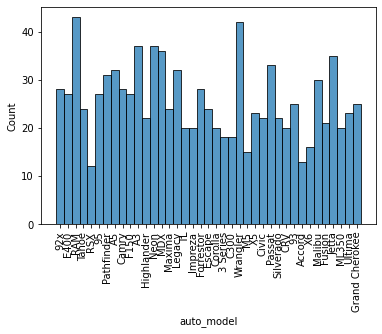




The Histogram Diagram for the attribute "auto_year" is
 AxesSubplot(0.125,0.125;0.775x0.755)


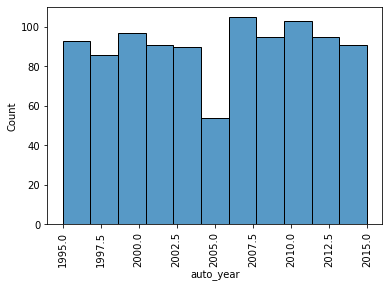




The Histogram Diagram for the attribute "fraud_reported" is
 AxesSubplot(0.125,0.125;0.775x0.755)


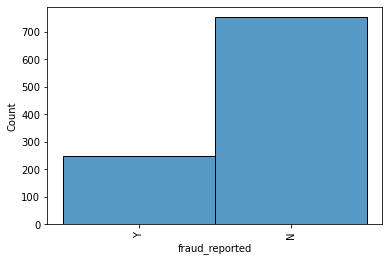

In [19]:
for i in df.columns.drop(['months_as_customer','policy_number','policy_bind_date','policy_annual_premium','insured_zip','capital-gains','capital-loss','incident_location','total_claim_amount','injury_claim','property_claim','vehicle_claim']):
    print(f'\nThe Histogram Diagram for the attribute "{i}" is\n {sns.histplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 3.Scatterplot

The Scatter Plot for the attribute "fraud_reported" & "months_as_customer" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


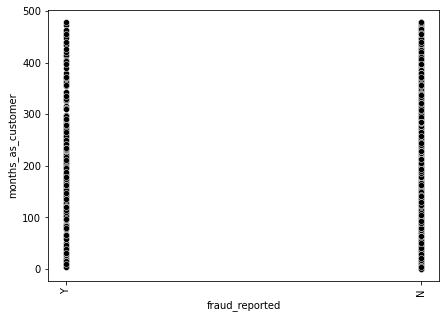



The Scatter Plot for the attribute "fraud_reported" & "age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


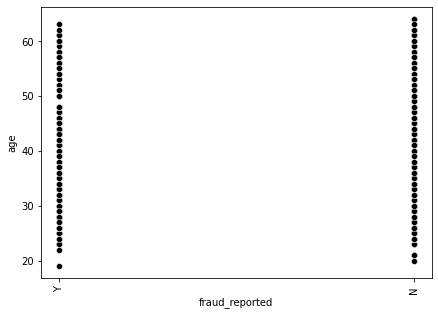



The Scatter Plot for the attribute "fraud_reported" & "policy_number" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


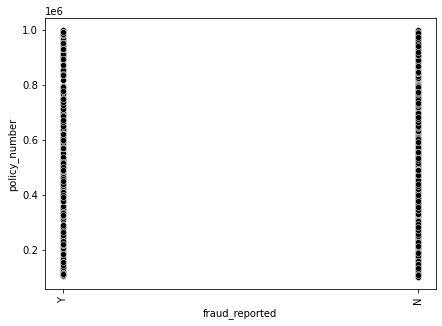



The Scatter Plot for the attribute "fraud_reported" & "policy_bind_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


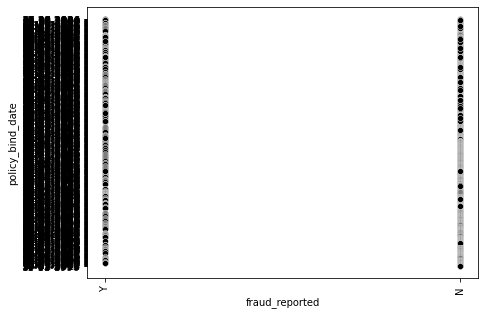



The Scatter Plot for the attribute "fraud_reported" & "policy_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


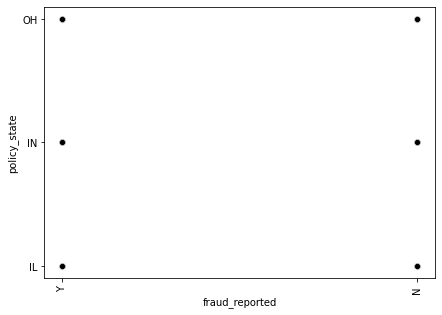



The Scatter Plot for the attribute "fraud_reported" & "policy_csl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


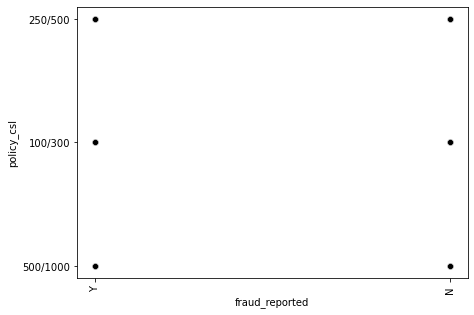



The Scatter Plot for the attribute "fraud_reported" & "policy_deductable" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


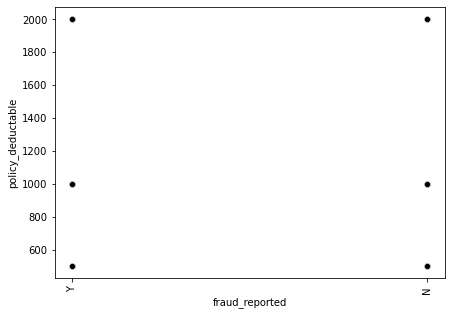



The Scatter Plot for the attribute "fraud_reported" & "policy_annual_premium" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


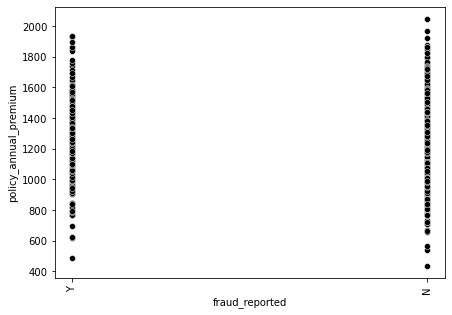



The Scatter Plot for the attribute "fraud_reported" & "umbrella_limit" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


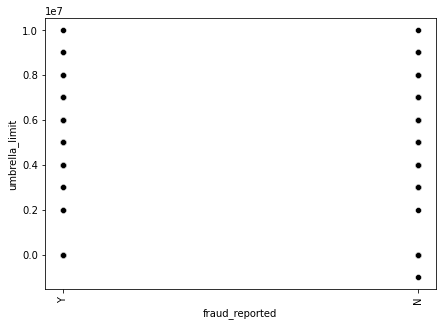



The Scatter Plot for the attribute "fraud_reported" & "insured_zip" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


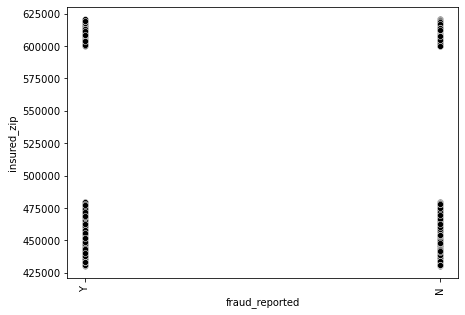



The Scatter Plot for the attribute "fraud_reported" & "insured_sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


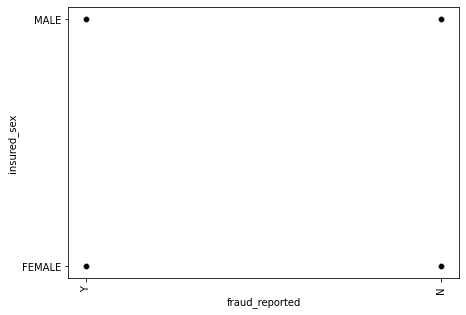



The Scatter Plot for the attribute "fraud_reported" & "insured_education_level" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


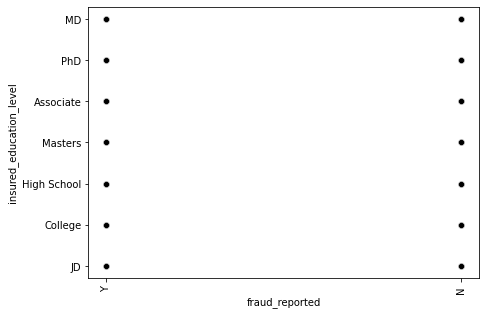



The Scatter Plot for the attribute "fraud_reported" & "insured_occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


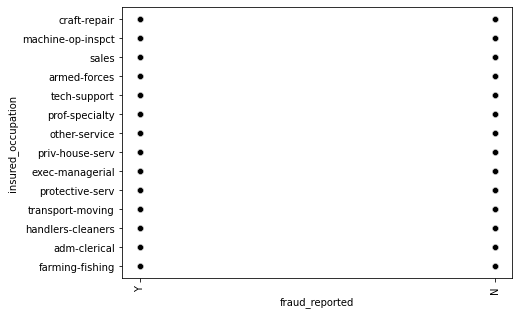



The Scatter Plot for the attribute "fraud_reported" & "insured_hobbies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


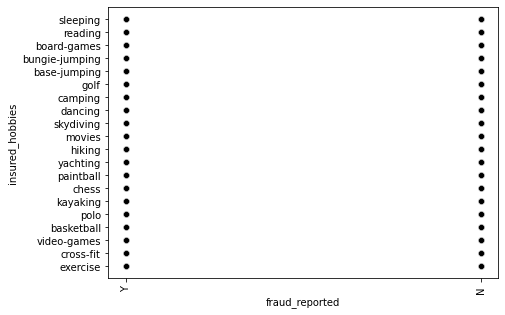



The Scatter Plot for the attribute "fraud_reported" & "insured_relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


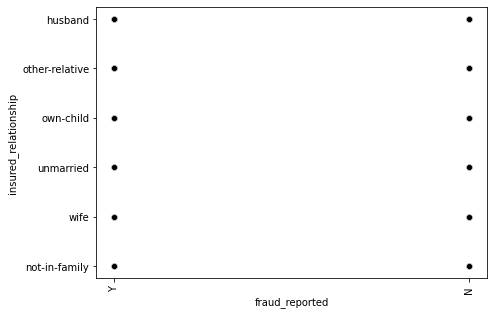



The Scatter Plot for the attribute "fraud_reported" & "capital-gains" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


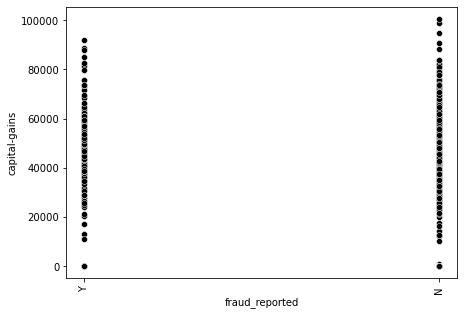



The Scatter Plot for the attribute "fraud_reported" & "capital-loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


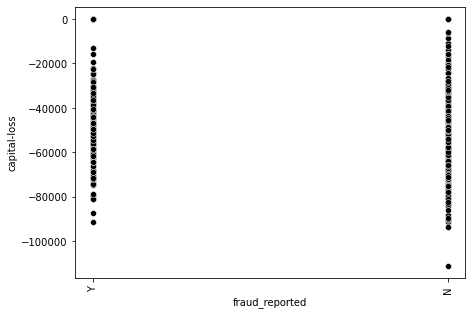



The Scatter Plot for the attribute "fraud_reported" & "incident_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


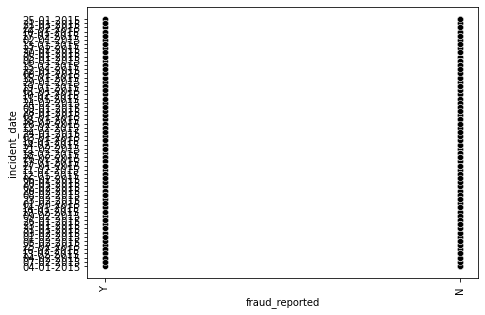



The Scatter Plot for the attribute "fraud_reported" & "incident_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


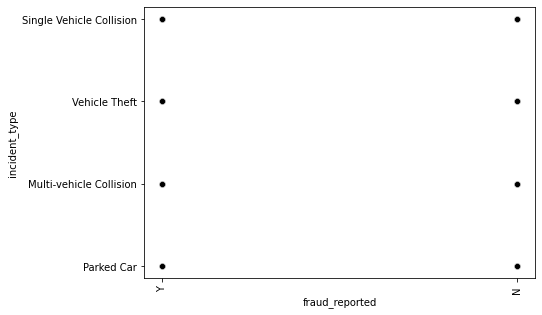



The Scatter Plot for the attribute "fraud_reported" & "collision_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


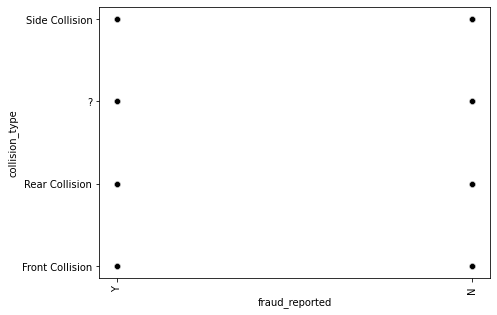



The Scatter Plot for the attribute "fraud_reported" & "incident_severity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


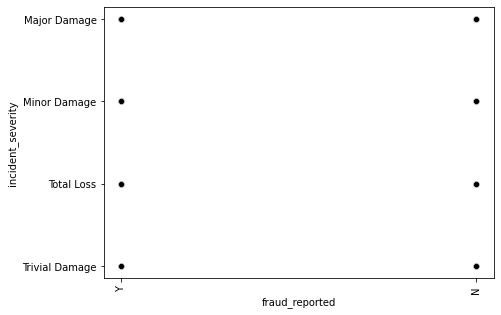



The Scatter Plot for the attribute "fraud_reported" & "authorities_contacted" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


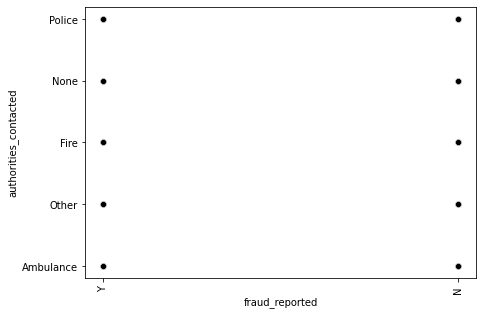



The Scatter Plot for the attribute "fraud_reported" & "incident_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


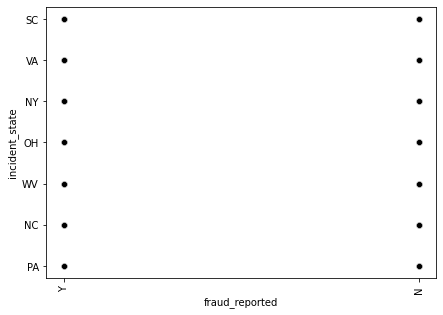



The Scatter Plot for the attribute "fraud_reported" & "incident_city" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


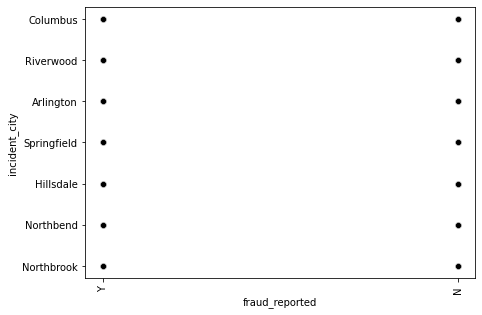



The Scatter Plot for the attribute "fraud_reported" & "incident_location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


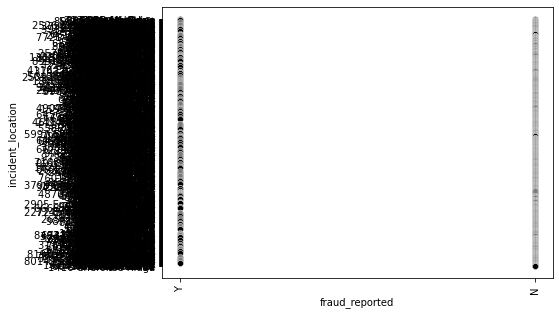



The Scatter Plot for the attribute "fraud_reported" & "incident_hour_of_the_day" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


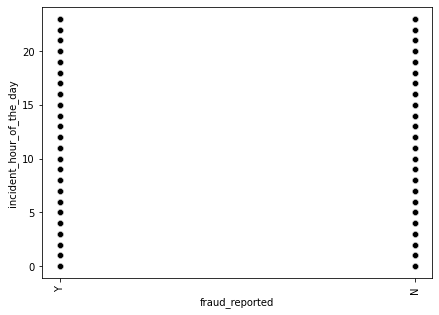



The Scatter Plot for the attribute "fraud_reported" & "number_of_vehicles_involved" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


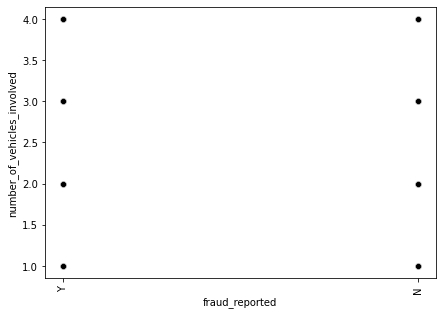



The Scatter Plot for the attribute "fraud_reported" & "property_damage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


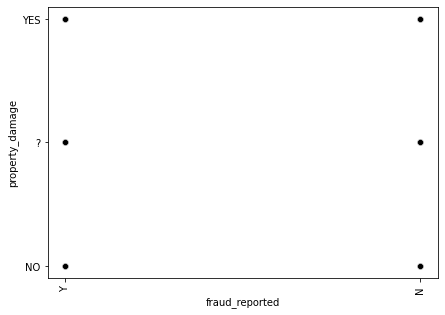



The Scatter Plot for the attribute "fraud_reported" & "bodily_injuries" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


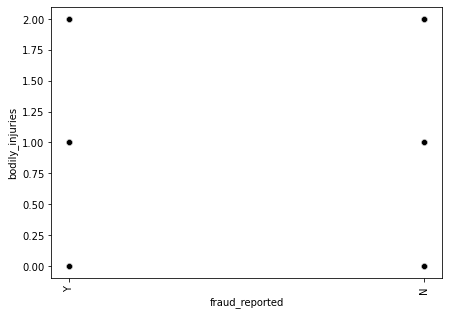



The Scatter Plot for the attribute "fraud_reported" & "witnesses" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


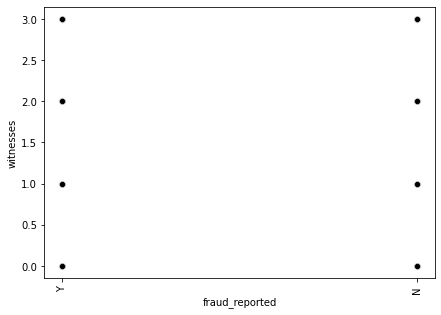



The Scatter Plot for the attribute "fraud_reported" & "police_report_available" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


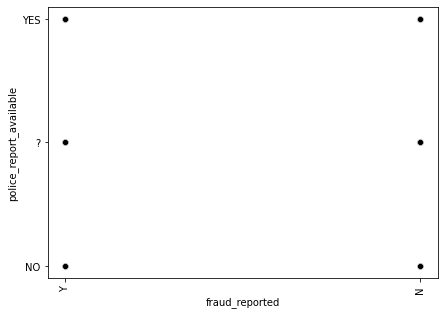



The Scatter Plot for the attribute "fraud_reported" & "total_claim_amount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


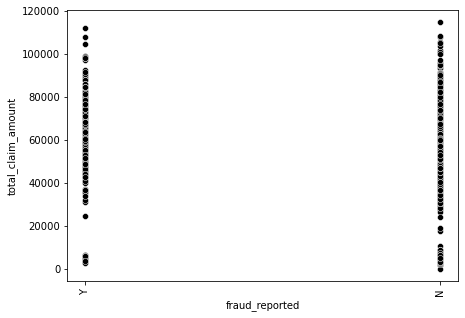



The Scatter Plot for the attribute "fraud_reported" & "injury_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


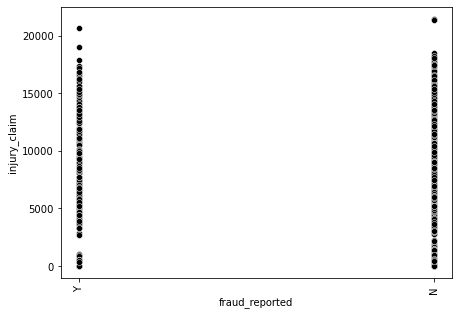



The Scatter Plot for the attribute "fraud_reported" & "property_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


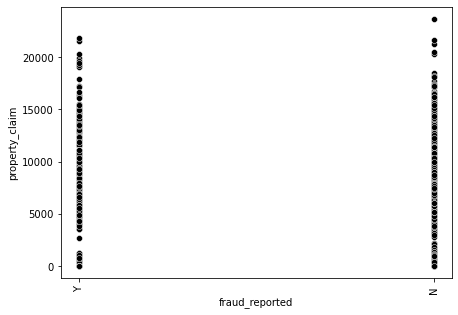



The Scatter Plot for the attribute "fraud_reported" & "vehicle_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


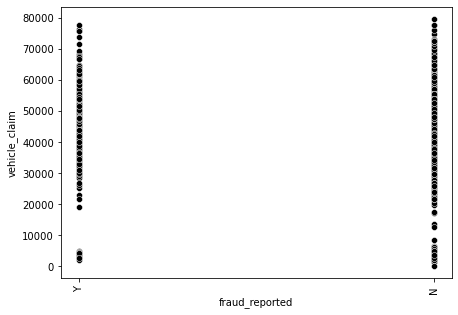



The Scatter Plot for the attribute "fraud_reported" & "auto_make" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


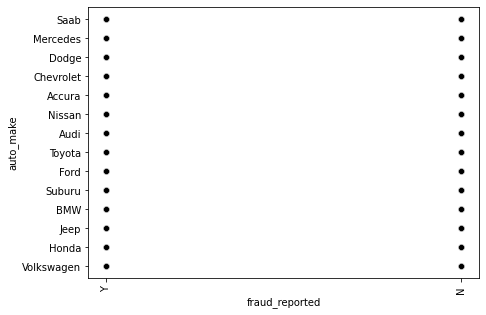



The Scatter Plot for the attribute "fraud_reported" & "auto_model" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


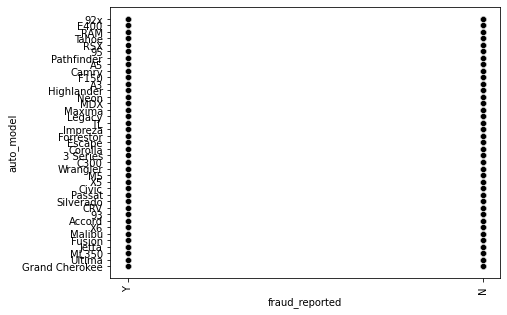



The Scatter Plot for the attribute "fraud_reported" & "auto_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


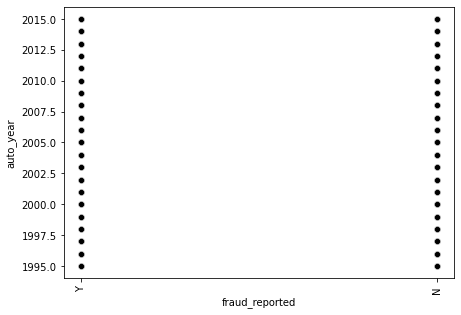



The Scatter Plot for the attribute "fraud_reported" & "fraud_reported" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


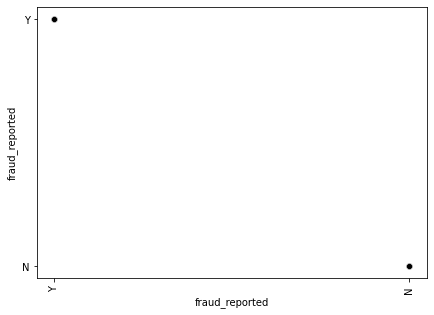

In [20]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "fraud_reported" & "{i}" is-\n {sns.scatterplot(df.fraud_reported,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 4.Lineplot

The Line Plot for the attribute "fraud_reported" & "months_as_customer" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


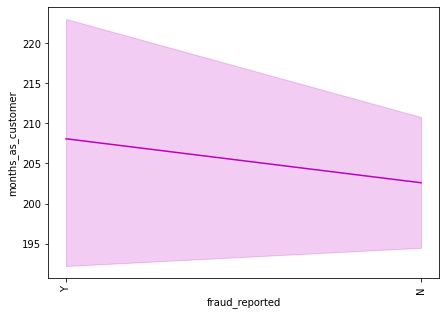



The Line Plot for the attribute "fraud_reported" & "age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


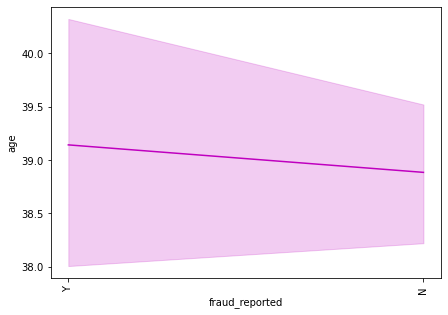



The Line Plot for the attribute "fraud_reported" & "policy_number" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


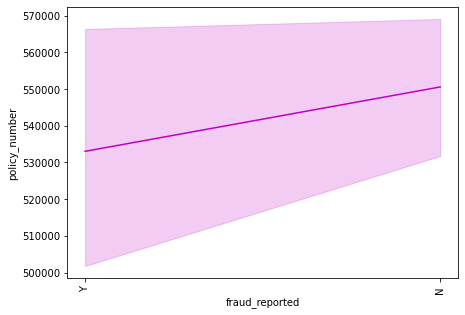



The Line Plot for the attribute "fraud_reported" & "policy_bind_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


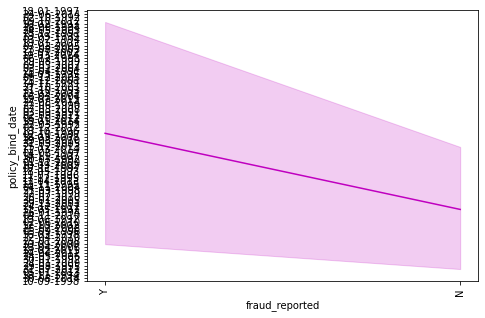



The Line Plot for the attribute "fraud_reported" & "policy_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


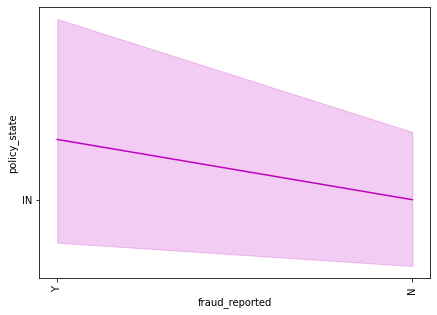



The Line Plot for the attribute "fraud_reported" & "policy_csl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


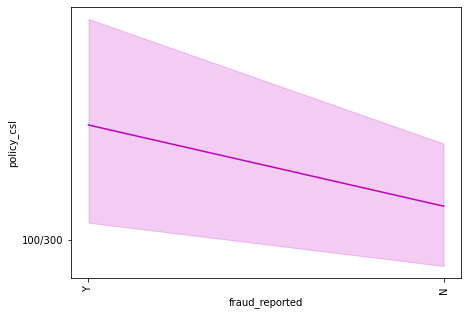



The Line Plot for the attribute "fraud_reported" & "policy_deductable" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


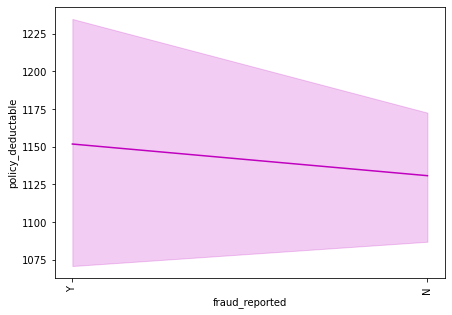



The Line Plot for the attribute "fraud_reported" & "policy_annual_premium" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


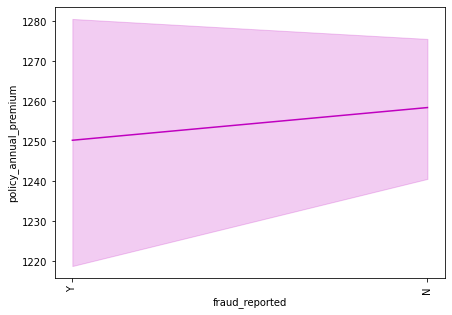



The Line Plot for the attribute "fraud_reported" & "umbrella_limit" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


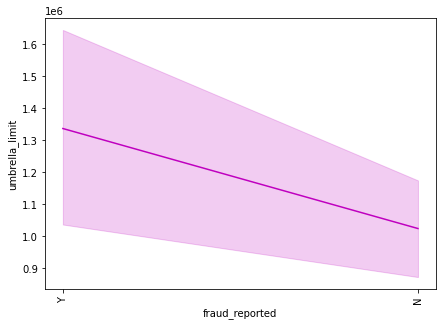



The Line Plot for the attribute "fraud_reported" & "insured_zip" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


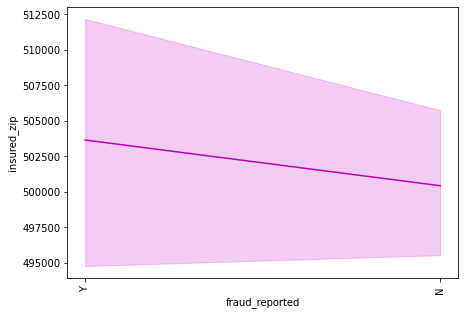



The Line Plot for the attribute "fraud_reported" & "insured_sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


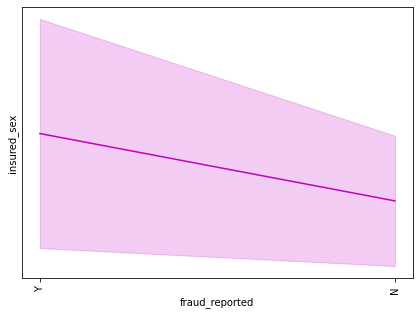



The Line Plot for the attribute "fraud_reported" & "insured_education_level" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


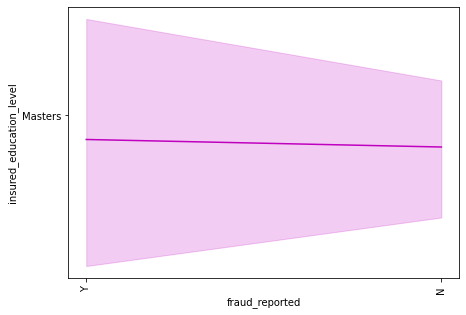



The Line Plot for the attribute "fraud_reported" & "insured_occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


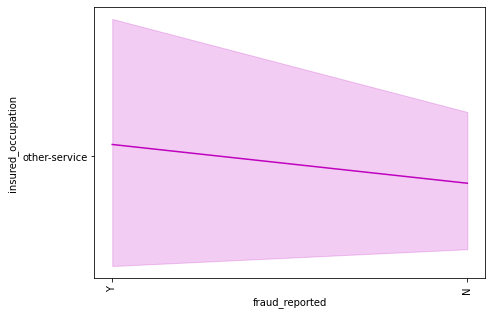



The Line Plot for the attribute "fraud_reported" & "insured_hobbies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


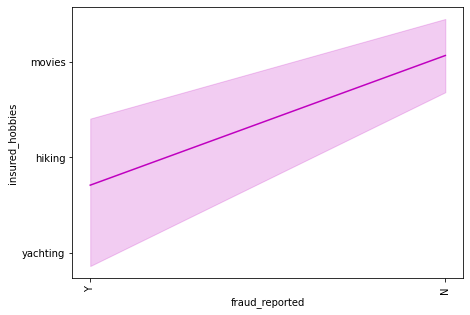



The Line Plot for the attribute "fraud_reported" & "insured_relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


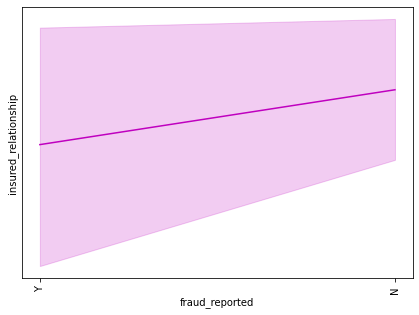



The Line Plot for the attribute "fraud_reported" & "capital-gains" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


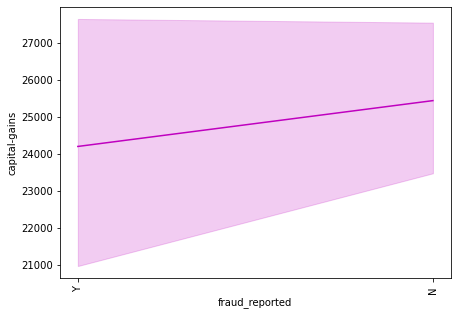



The Line Plot for the attribute "fraud_reported" & "capital-loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


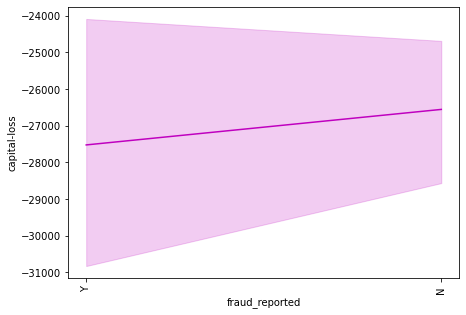



The Line Plot for the attribute "fraud_reported" & "incident_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


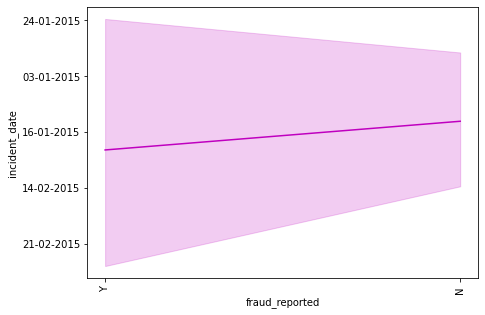



The Line Plot for the attribute "fraud_reported" & "incident_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


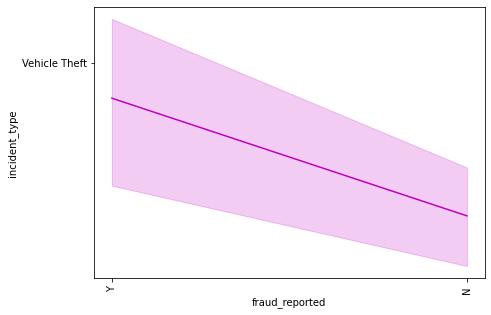



The Line Plot for the attribute "fraud_reported" & "collision_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


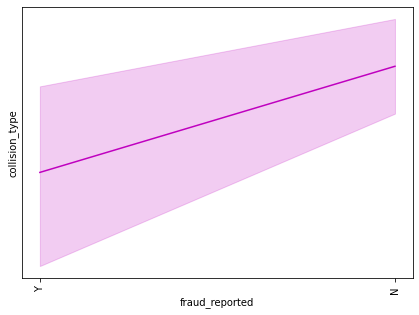



The Line Plot for the attribute "fraud_reported" & "incident_severity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


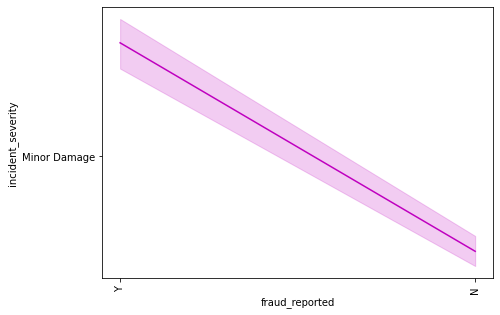



The Line Plot for the attribute "fraud_reported" & "authorities_contacted" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


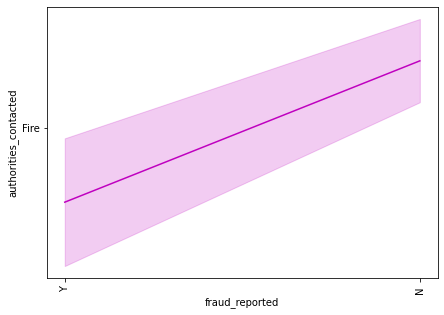



The Line Plot for the attribute "fraud_reported" & "incident_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


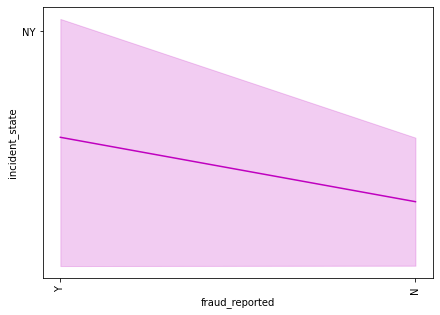



The Line Plot for the attribute "fraud_reported" & "incident_city" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


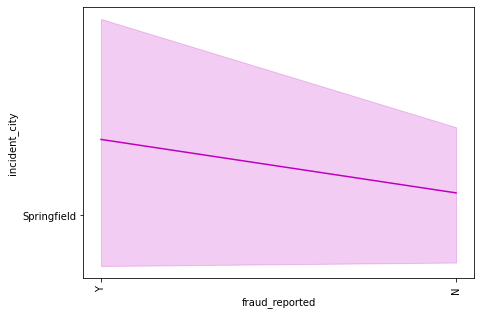



The Line Plot for the attribute "fraud_reported" & "incident_location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


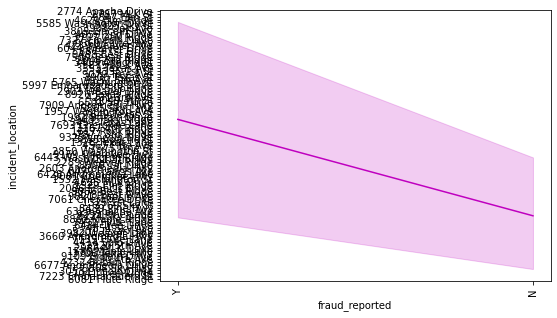



The Line Plot for the attribute "fraud_reported" & "incident_hour_of_the_day" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


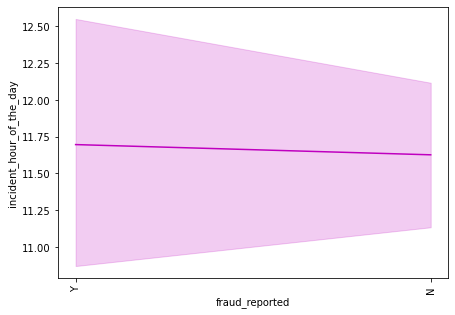



The Line Plot for the attribute "fraud_reported" & "number_of_vehicles_involved" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


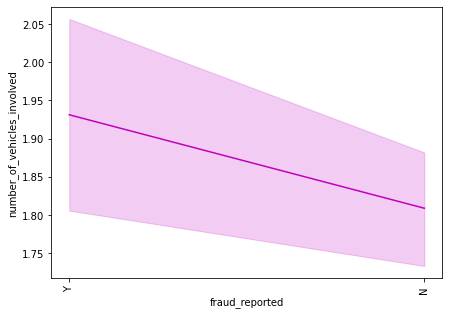



The Line Plot for the attribute "fraud_reported" & "property_damage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


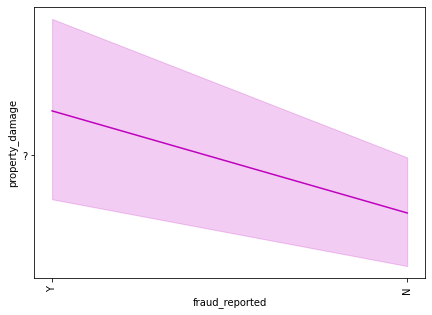



The Line Plot for the attribute "fraud_reported" & "bodily_injuries" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


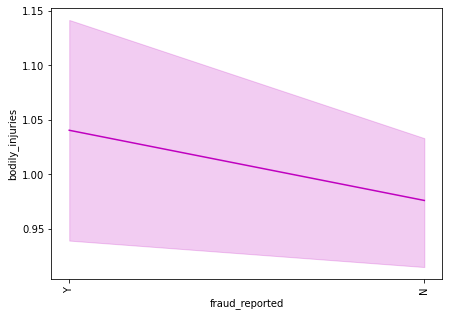



The Line Plot for the attribute "fraud_reported" & "witnesses" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


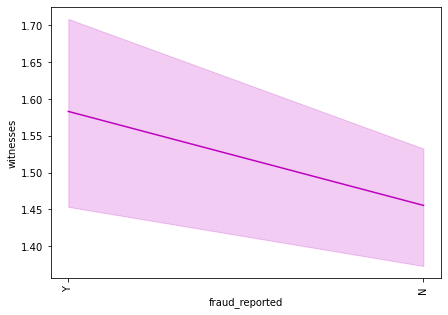



The Line Plot for the attribute "fraud_reported" & "police_report_available" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


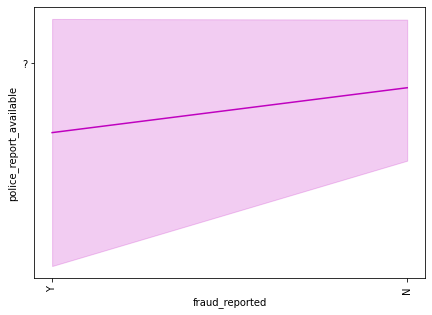



The Line Plot for the attribute "fraud_reported" & "total_claim_amount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


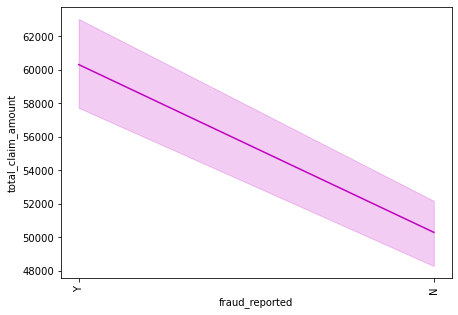



The Line Plot for the attribute "fraud_reported" & "injury_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


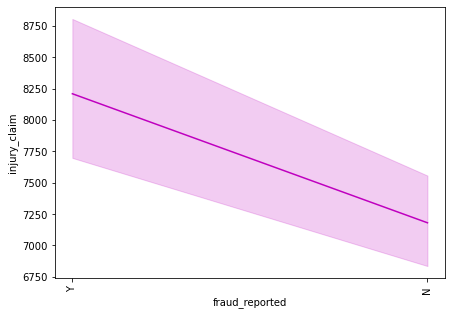



The Line Plot for the attribute "fraud_reported" & "property_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


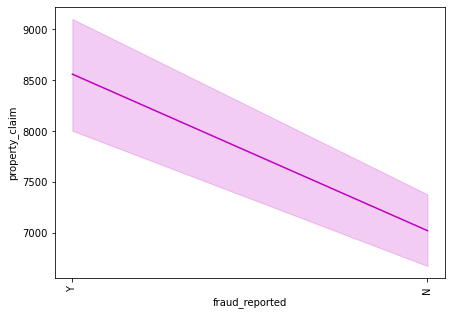



The Line Plot for the attribute "fraud_reported" & "vehicle_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


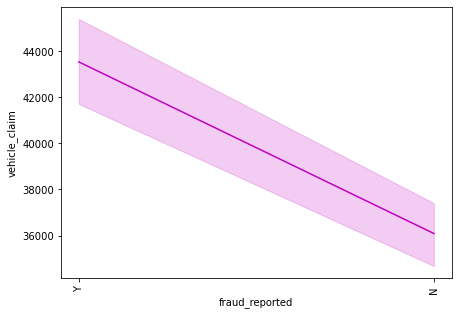



The Line Plot for the attribute "fraud_reported" & "auto_make" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


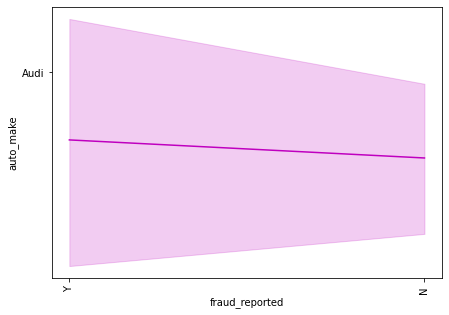



The Line Plot for the attribute "fraud_reported" & "auto_model" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


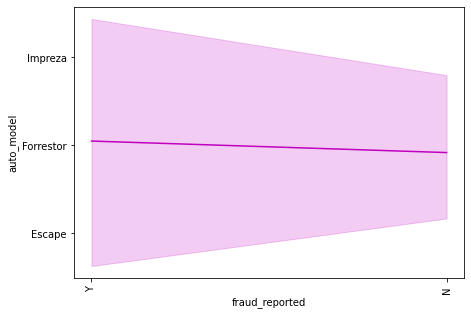



The Line Plot for the attribute "fraud_reported" & "auto_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


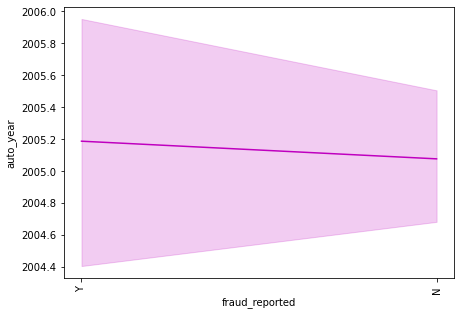



The Line Plot for the attribute "fraud_reported" & "fraud_reported" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


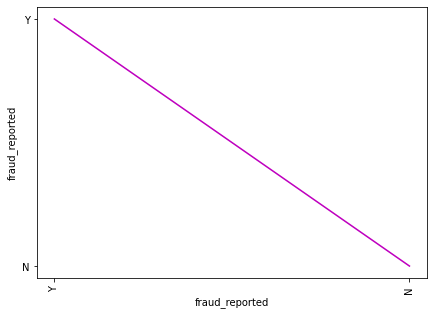

In [21]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Line Plot for the attribute "fraud_reported" & "{i}" is-\n {sns.lineplot(df.fraud_reported,df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 5.Categorical Plotting

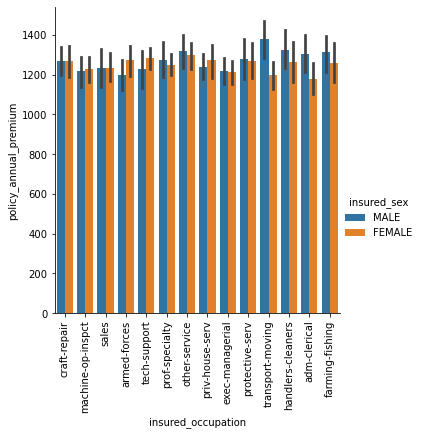

In [22]:
sns.catplot(x='insured_occupation',y='policy_annual_premium',hue='insured_sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

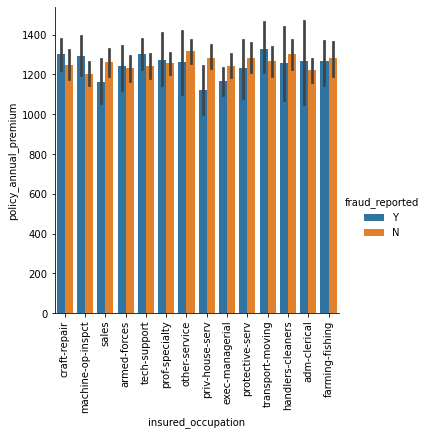

In [23]:
sns.catplot(x='insured_occupation',y='policy_annual_premium',hue='fraud_reported',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Most of the male who are paying high premiums for their policies are working in transport moving profession and frauds are higher in their case

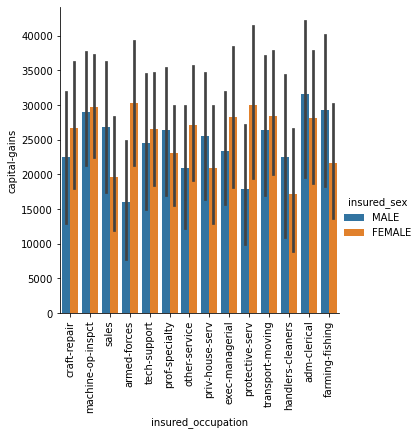

In [24]:
sns.catplot(x='insured_occupation',y='capital-gains',hue='insured_sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

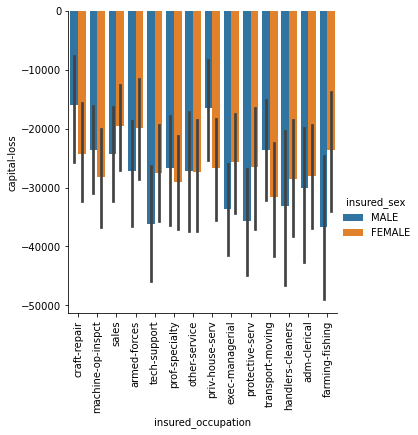

In [25]:
sns.catplot(x='insured_occupation',y='capital-loss',hue='insured_sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

The male person who are working in Handlers and cleaners department have higher capital gain and male people who are working in farming and fishing profession are suffering higher capital loss

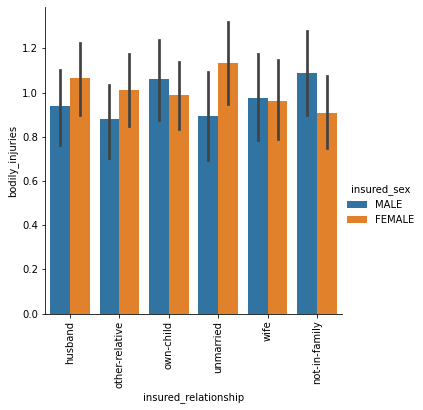

In [26]:
sns.catplot(x='insured_relationship',y='bodily_injuries',hue='insured_sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Unmarried females are having higher bodily_injuries

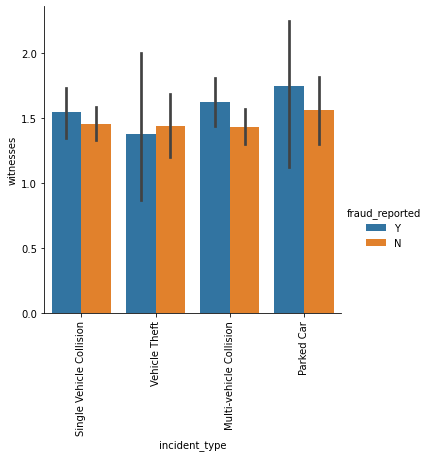

In [27]:
sns.catplot(x='incident_type',y='witnesses',hue='fraud_reported',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

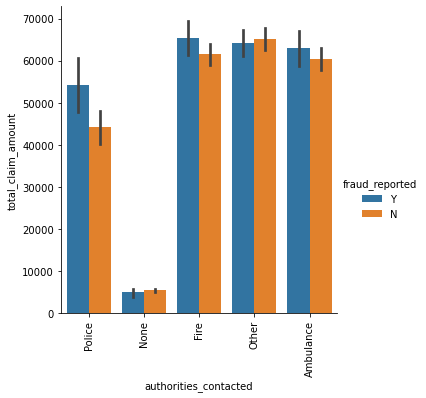

In [28]:
sns.catplot(x='authorities_contacted',y='total_claim_amount',hue='fraud_reported',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

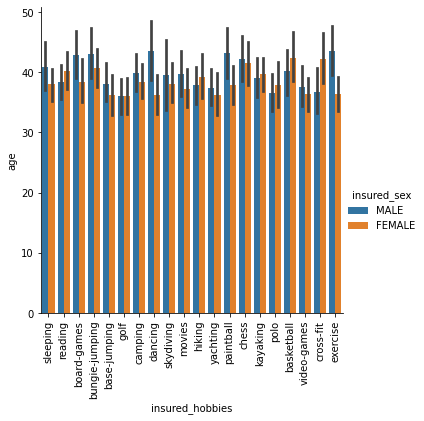

In [29]:
sns.catplot(x='insured_hobbies',y='age',hue='insured_sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

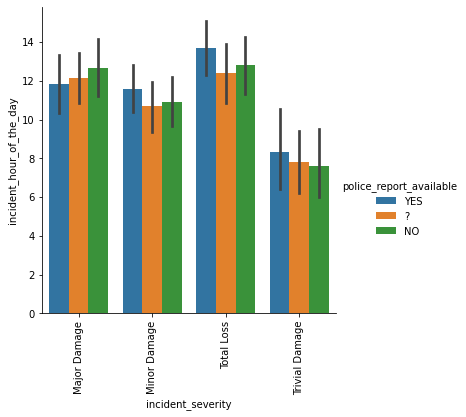

In [30]:
sns.catplot(x='incident_severity',y='incident_hour_of_the_day',hue='police_report_available',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

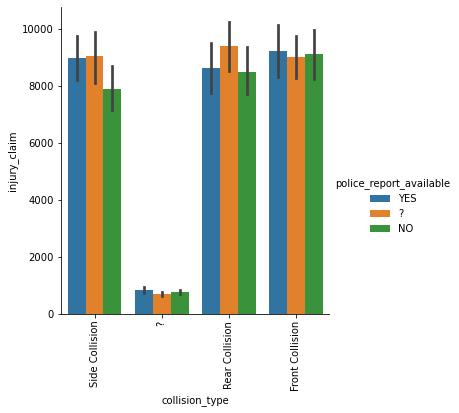

In [31]:
sns.catplot(x='collision_type',y='injury_claim',hue='police_report_available',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

In [32]:
#datetime format
df.incident_date=pd.to_datetime(df.incident_date)
df.incident_date.dtypes

dtype('<M8[ns]')

In [33]:
#replace the zero's with mean of that column
df['umbrella_limit']=df['umbrella_limit'].replace(0,df['umbrella_limit'].mean())

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for j in categorical_columns:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [36]:
df.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 328   48         521585               532             2   
1                 228   42         342868               821             1   
2                 134   29         687698               186             2   
3                 256   41         227811               766             0   
4                 228   44         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91         1101000   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0       466132  ...          2                        2               71610   
1       468176  ...          0                        0                5070   
2       430632  ...          3                        1               34650   
3       608117  ...          2                        1               63400   
4       610706  ...          1                        1                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080         10           1   
1           780             780           3510          8          12   
2          7700            3850          23100          4          30   
3          6340            6340          50720          3          34   
4          1300             650           4550          0          31   

   auto_year  fraud_reported  
0       2004               1  
1       2007               1  
2       2007               0  
3       2014               1  
4       2009               0  

[5 rows x 39 columns]

In [37]:
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

1. 0 represents fraud is not reported there

2. 1 represents fraud is reported there

3. Also the class is imbalanced

# 6.ViolinPlot

The Violin-Plot for the attribute "months_as_customer" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


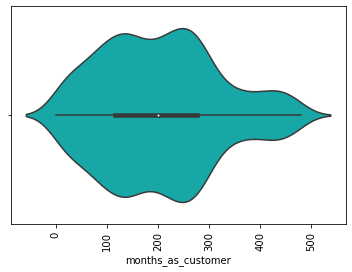



The Violin-Plot for the attribute "age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


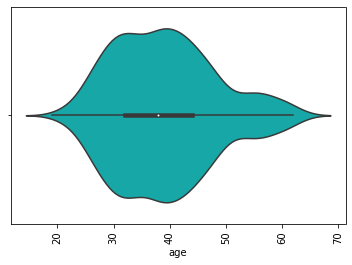



The Violin-Plot for the attribute "policy_number" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


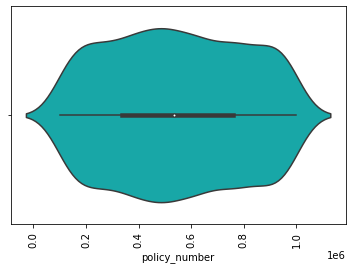



The Violin-Plot for the attribute "policy_bind_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


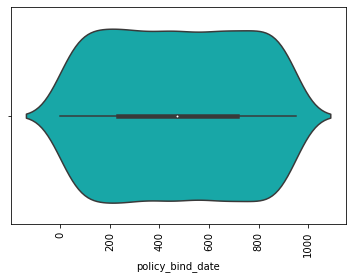



The Violin-Plot for the attribute "policy_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


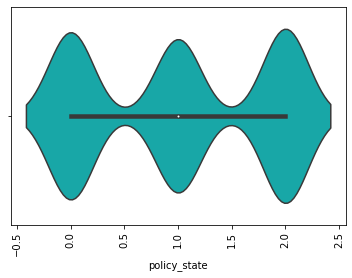



The Violin-Plot for the attribute "policy_csl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


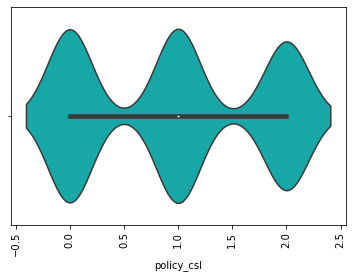



The Violin-Plot for the attribute "policy_deductable" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


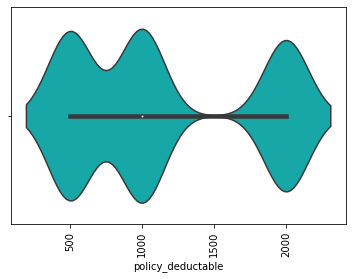



The Violin-Plot for the attribute "policy_annual_premium" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


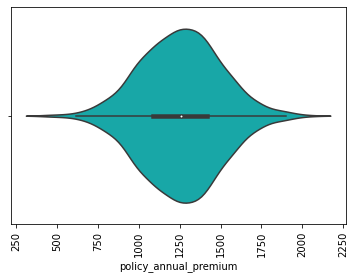



The Violin-Plot for the attribute "umbrella_limit" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


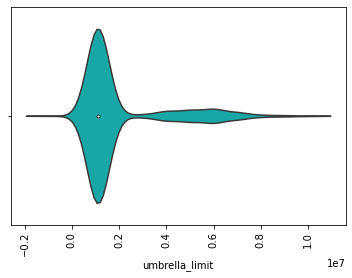



The Violin-Plot for the attribute "insured_zip" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


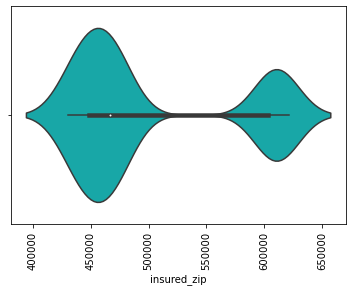



The Violin-Plot for the attribute "insured_sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


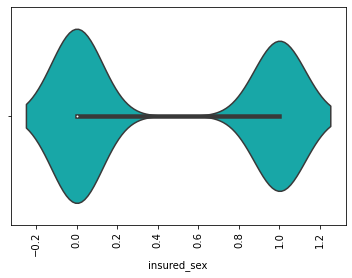



The Violin-Plot for the attribute "insured_education_level" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


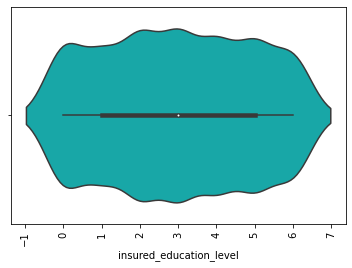



The Violin-Plot for the attribute "insured_occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


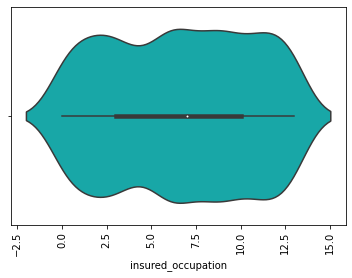



The Violin-Plot for the attribute "insured_hobbies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


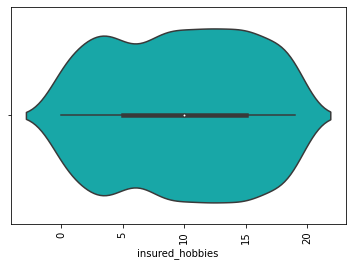



The Violin-Plot for the attribute "insured_relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


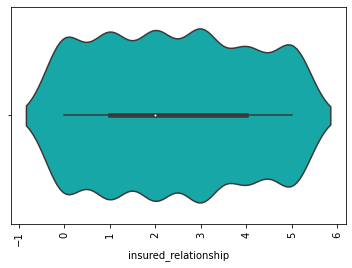



The Violin-Plot for the attribute "capital-gains" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


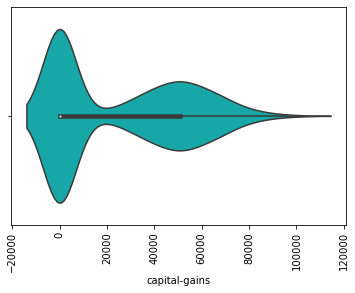



The Violin-Plot for the attribute "capital-loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


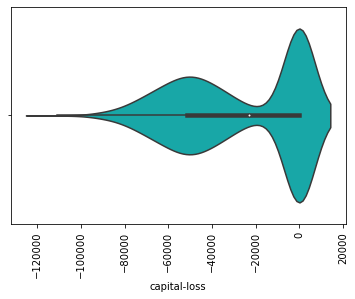



The Violin-Plot for the attribute "incident_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


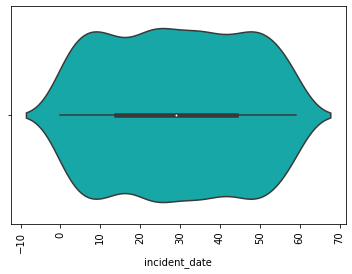



The Violin-Plot for the attribute "incident_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


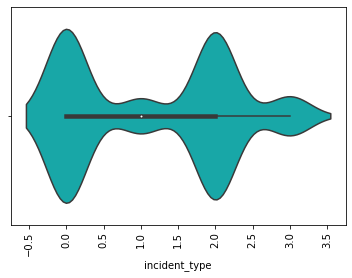



The Violin-Plot for the attribute "collision_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


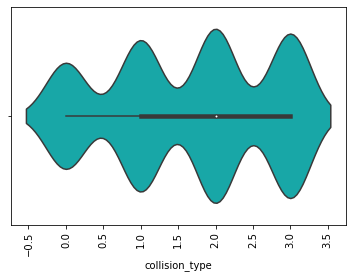



The Violin-Plot for the attribute "incident_severity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


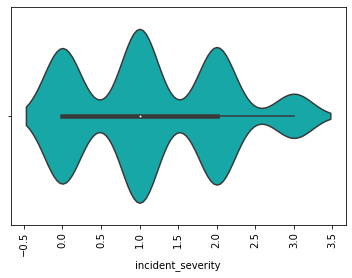



The Violin-Plot for the attribute "authorities_contacted" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


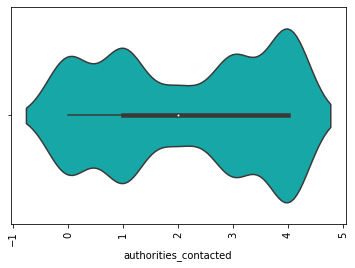



The Violin-Plot for the attribute "incident_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


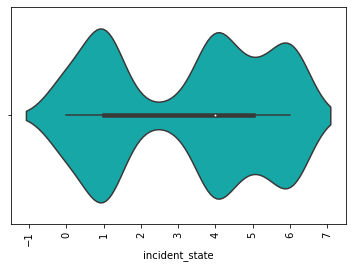



The Violin-Plot for the attribute "incident_city" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


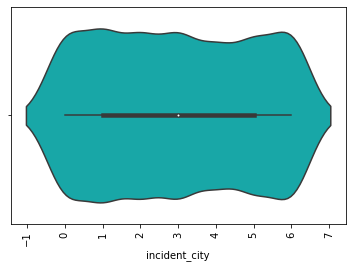



The Violin-Plot for the attribute "incident_location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


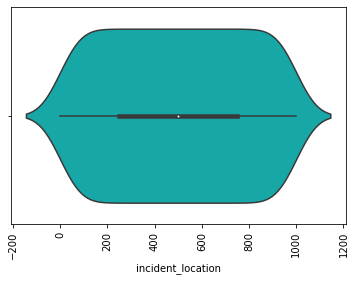



The Violin-Plot for the attribute "incident_hour_of_the_day" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


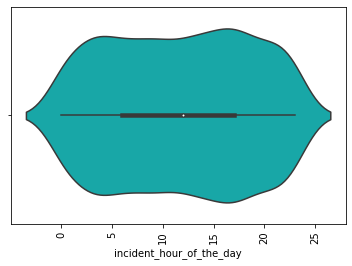



The Violin-Plot for the attribute "number_of_vehicles_involved" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


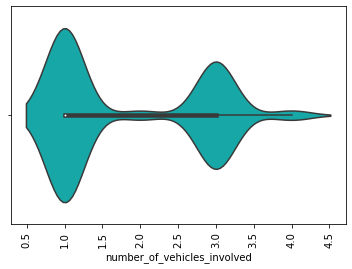



The Violin-Plot for the attribute "property_damage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


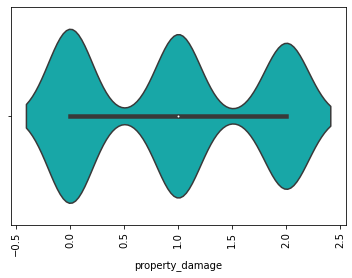



The Violin-Plot for the attribute "bodily_injuries" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


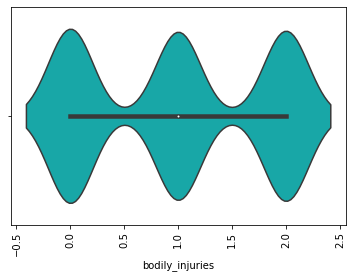



The Violin-Plot for the attribute "witnesses" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


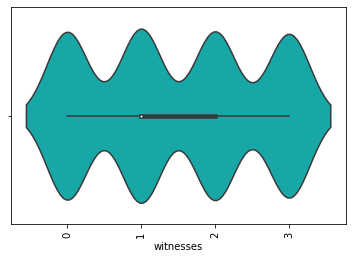



The Violin-Plot for the attribute "police_report_available" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


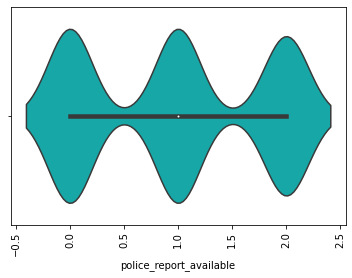



The Violin-Plot for the attribute "total_claim_amount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


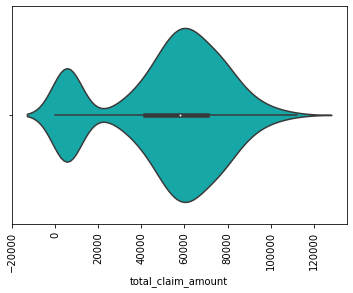



The Violin-Plot for the attribute "injury_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


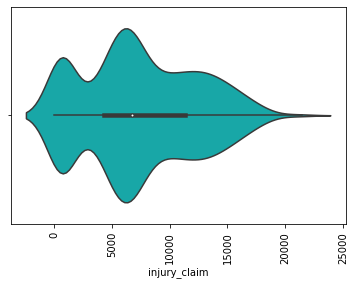



The Violin-Plot for the attribute "property_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


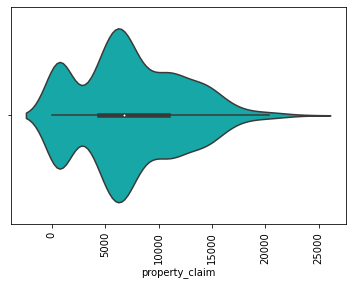



The Violin-Plot for the attribute "vehicle_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


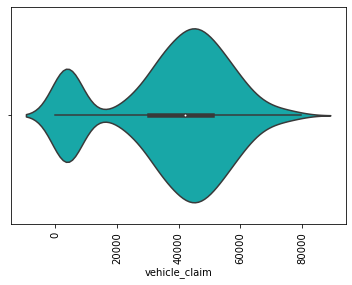



The Violin-Plot for the attribute "auto_make" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


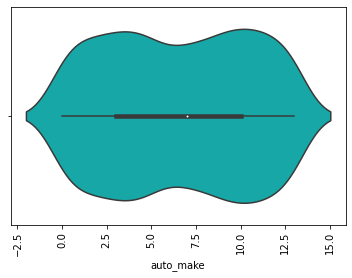



The Violin-Plot for the attribute "auto_model" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


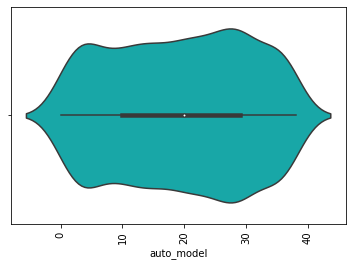



The Violin-Plot for the attribute "auto_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


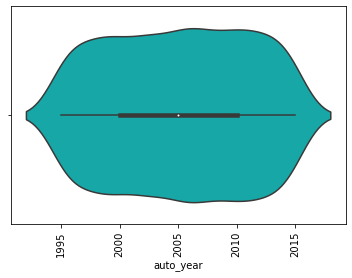



The Violin-Plot for the attribute "fraud_reported" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


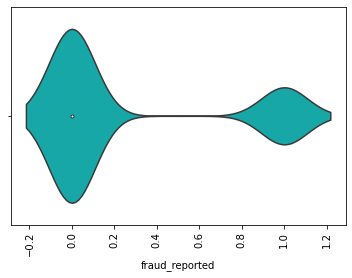

In [38]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# Descriptive Statistics

In [39]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_bind_date             1000.0  4.743320e+02  2.754029e+02        0.00   
policy_state                 1000.0  1.014000e+00  8.309600e-01        0.00   
policy_csl                   1000.0  9.510000e-01  8.045162e-01        0.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.979598e+06  1.880709e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
insured_sex                  1000.0  4.630000e-01  4.988786e-01        0.00   
insured_education_level      1000.0  2.966000e+00  1.948497e+00        0.00   
insured_occupation           1000.0  6.653000e+00  4.019048e+00        0.00   
insured_hobbies              1000.0  9.731000e+00  5.674049e+00        0.00   
insured_relationship         1000.0  2.416000e+00  1.681003e+00        0.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_date                1000.0  2.919200e+01  1.726636e+01        0.00   
incident_type                1000.0  1.172000e+00  1.081474e+00        0.00   
collision_type               1000.0  1.666000e+00  1.063755e+00        0.00   
incident_severity            1000.0  1.184000e+00  9.396952e-01        0.00   
authorities_contacted        1000.0  2.167000e+00  1.532142e+00        0.00   
incident_state               1000.0  3.242000e+00  2.155942e+00        0.00   
incident_city                1000.0  2.966000e+00  2.044266e+00        0.00   
incident_location            1000.0  4.995000e+02  2.888194e+02        0.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
property_damage              1000.0  9.420000e-01  8.119700e-01        0.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
police_report_available      1000.0  9.710000e-01  8.104417e-01        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_make                    1000.0  6.546000e+00  4.034869e+00        0.00   
auto_model                   1000.0  1.931800e+01  1.113611e+01        0.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
fraud_reported               1000.0  2.470000e-01  4.314825e-01        0.00   

                                      25%        50%          75%          max  
months_as_customer           1.157500e+02      199.5      276.250       479.00  
age                          3.200000e+01       38.0       44.000        64.00  
policy_number                3.359802e+05   533135.0   759099.750    999435.00  
policy_bind_date             2.337500e+02      472.5      713.250       950.00  
policy_state                 0.000000e+00        1.0        2.000         2.00  
policy_csl                   0.000000e+00        1.0        2.000         2.00  
policy_deductable            5.000000e+02     1000.0     2000.000      2000.00  
policy_annual_premium        1.089608e+03     1257.2     1415.695      2047.59  
umbrella_limit               1.101000e+06  1101000.0  1101000.000  10000000.00  
insured_zip                  4.484045e+05   466445.5   6032

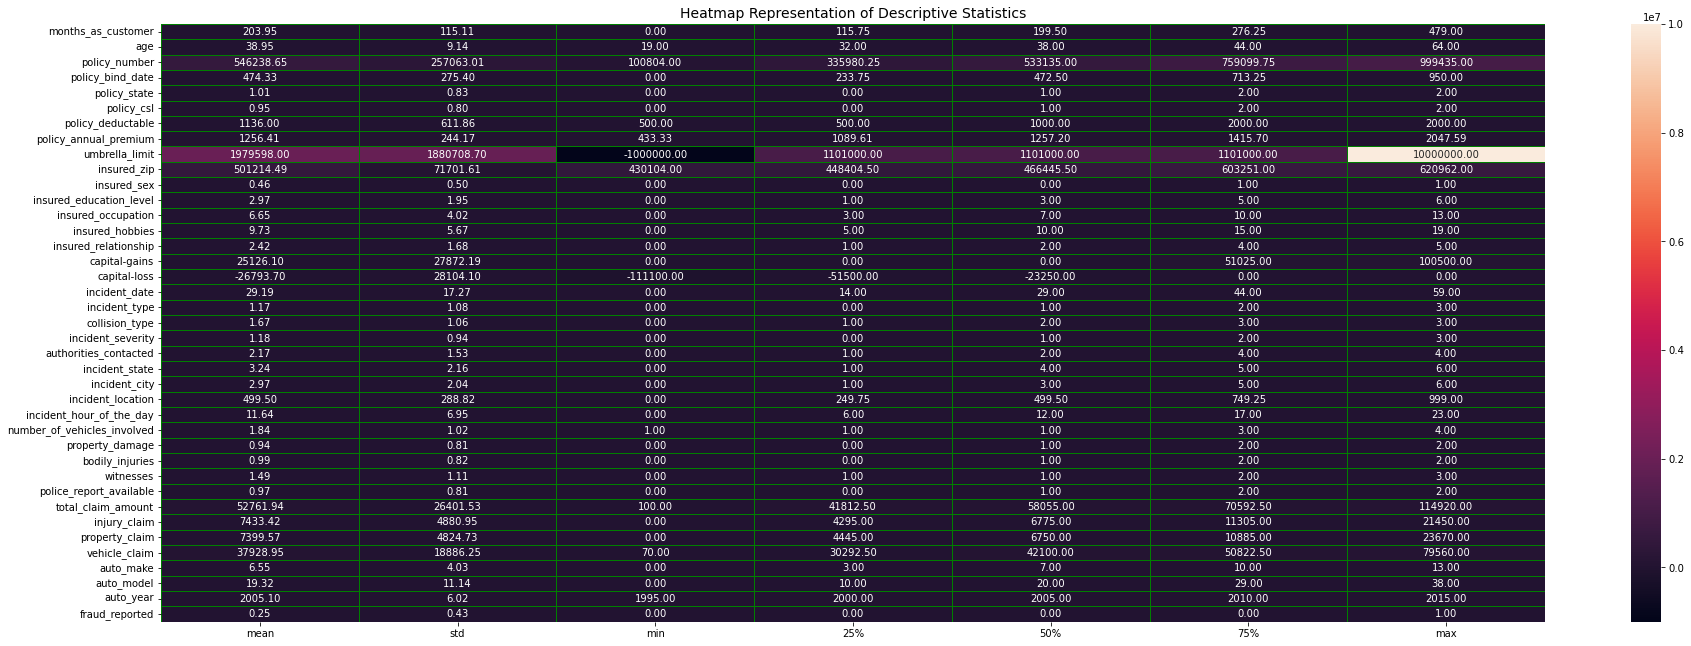

In [40]:
plt.figure(figsize=(31,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

# Correlation

In [41]:
df.corr().fraud_reported.sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.028159
incident_date                 -0.028004
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544


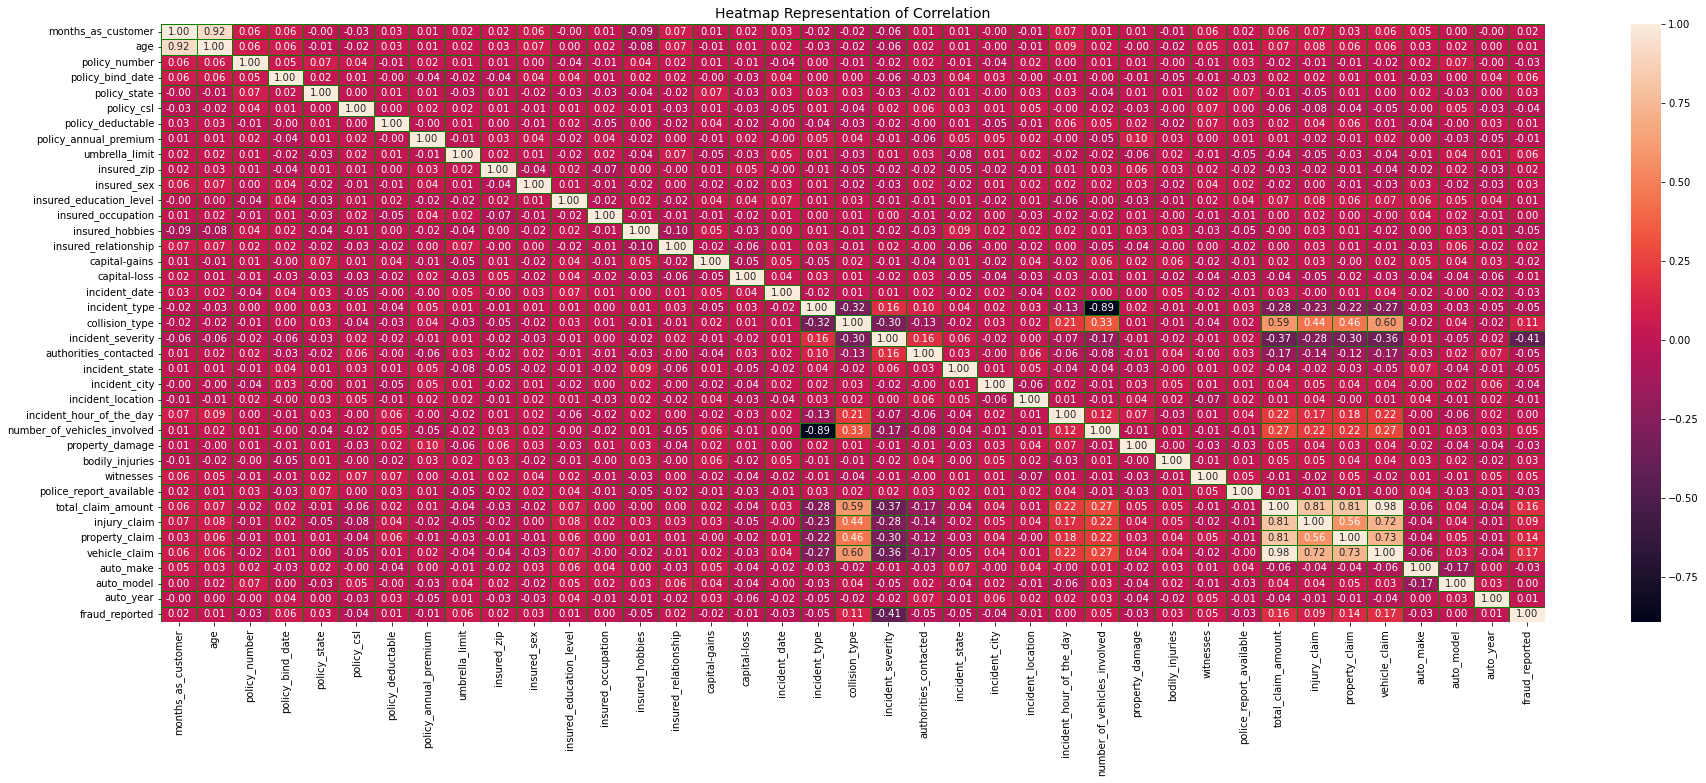

In [42]:
plt.figure(figsize=(31,11))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

# Multicollinearity

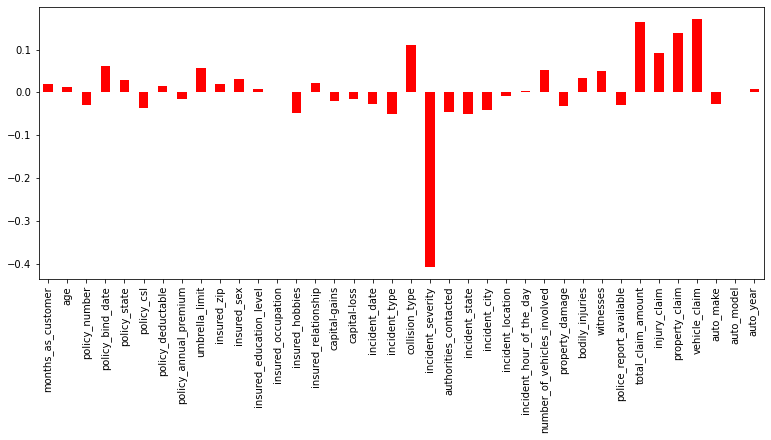

In [43]:
plt.figure(figsize=(13,5))
df.corr().fraud_reported.drop(['fraud_reported']).plot(kind='bar',color='r')
plt.show()

# Skewness

In [44]:
df.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
collision_type                -0.193345
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_hobbies               -0.061563
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
policy_state                  -0.026177
auto_make                     -0.018797
insured_education_level       -0.000148
incident_location              0.000000
policy_annual_premium          0.004402
incident_date                  0.005157
policy_bind_date               0.005194
bodily_injuries                0.014777
witnesses                      0.019636
policy_number                  0.038991
incident_city                  0.049531
police_report_available        0.052967
insured_relationship           0.077488
policy_csl                     0.088928


# Distribution Plot

Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute "months_as_customer" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


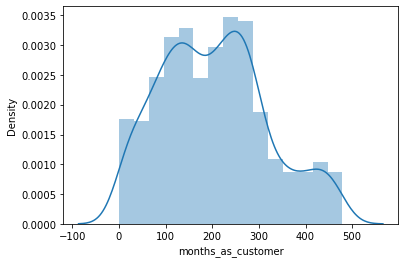



The Distribution Plot for attribute "age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


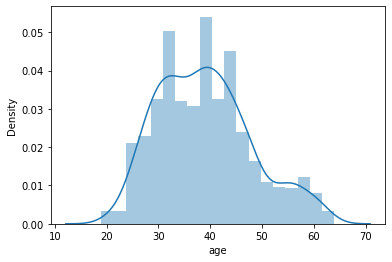



The Distribution Plot for attribute "policy_number" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


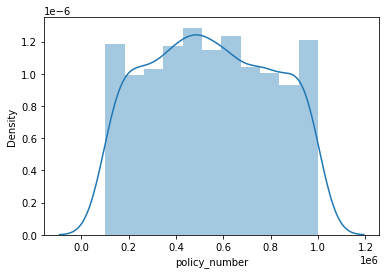



The Distribution Plot for attribute "policy_bind_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


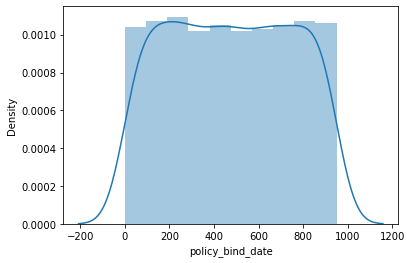



The Distribution Plot for attribute "policy_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


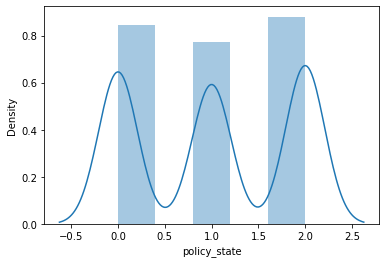



The Distribution Plot for attribute "policy_csl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


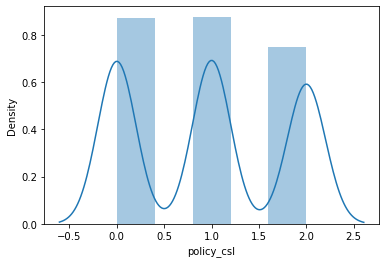



The Distribution Plot for attribute "policy_deductable" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


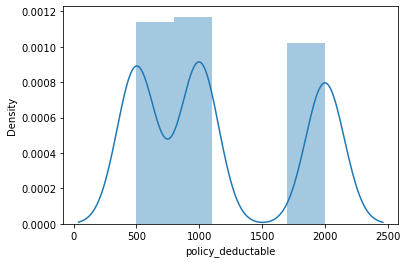



The Distribution Plot for attribute "policy_annual_premium" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


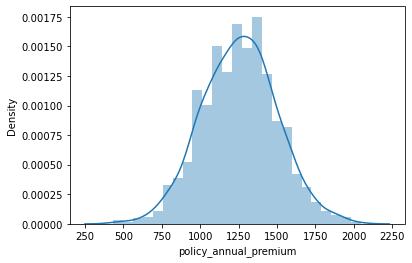



The Distribution Plot for attribute "umbrella_limit" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


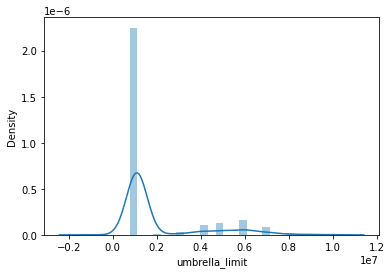



The Distribution Plot for attribute "insured_zip" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


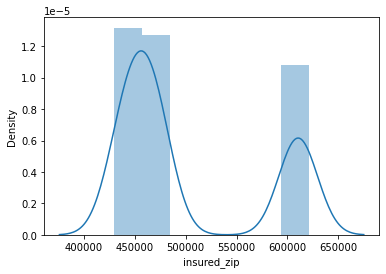



The Distribution Plot for attribute "insured_sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


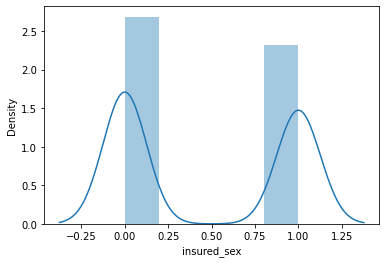



The Distribution Plot for attribute "insured_education_level" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


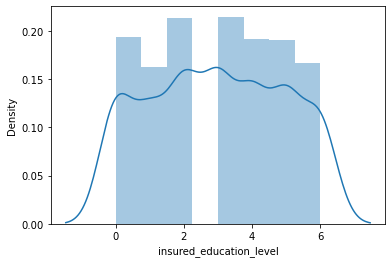



The Distribution Plot for attribute "insured_occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


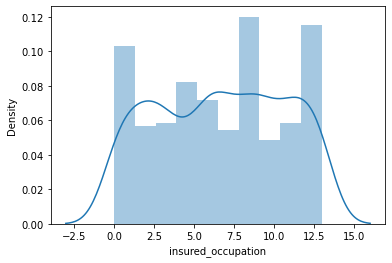



The Distribution Plot for attribute "insured_hobbies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


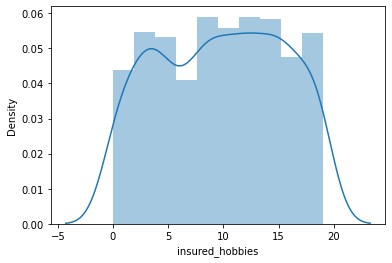



The Distribution Plot for attribute "insured_relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


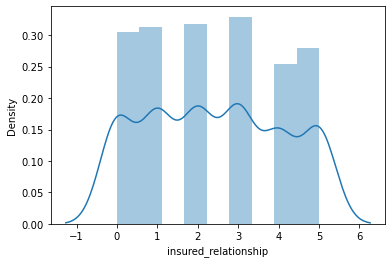



The Distribution Plot for attribute "capital-gains" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


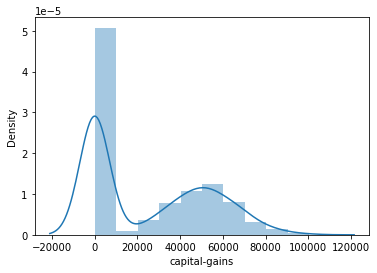



The Distribution Plot for attribute "capital-loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


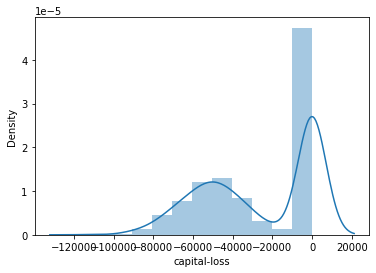



The Distribution Plot for attribute "incident_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


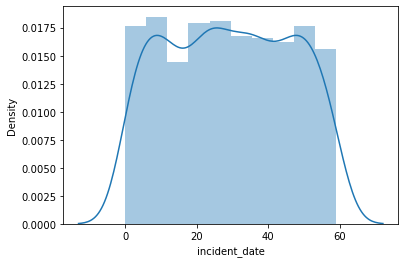



The Distribution Plot for attribute "incident_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


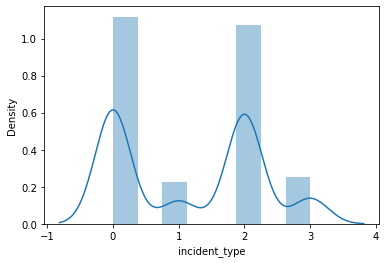



The Distribution Plot for attribute "collision_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


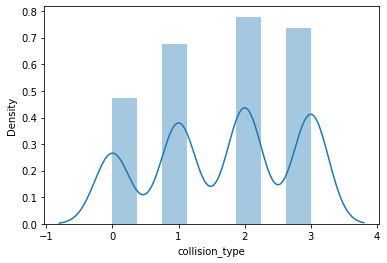



The Distribution Plot for attribute "incident_severity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


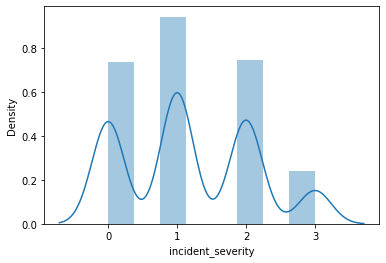



The Distribution Plot for attribute "authorities_contacted" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


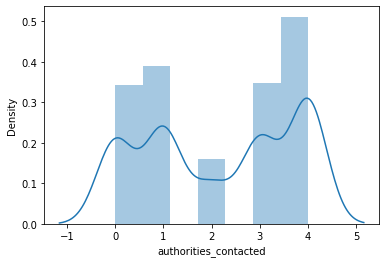



The Distribution Plot for attribute "incident_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


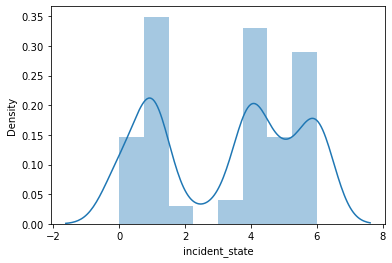



The Distribution Plot for attribute "incident_city" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


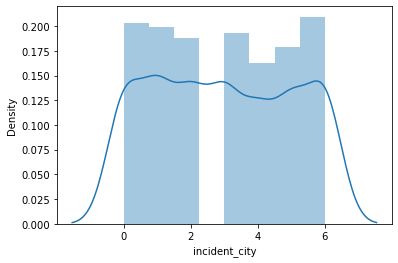



The Distribution Plot for attribute "incident_location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


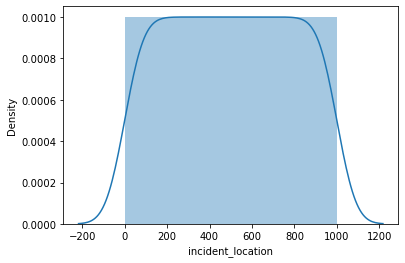



The Distribution Plot for attribute "incident_hour_of_the_day" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


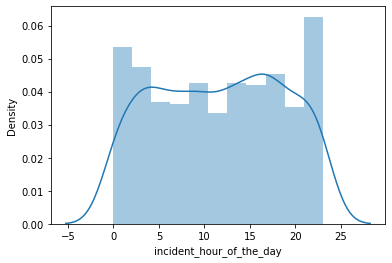



The Distribution Plot for attribute "number_of_vehicles_involved" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


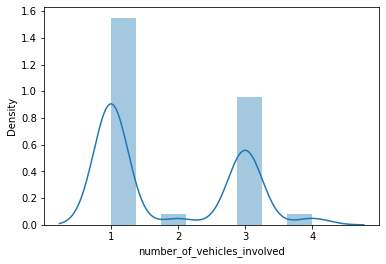



The Distribution Plot for attribute "property_damage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


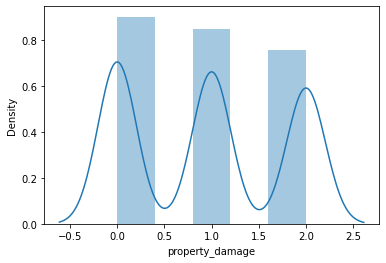



The Distribution Plot for attribute "bodily_injuries" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


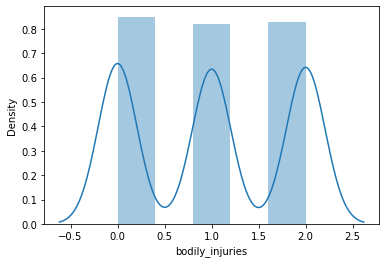



The Distribution Plot for attribute "witnesses" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


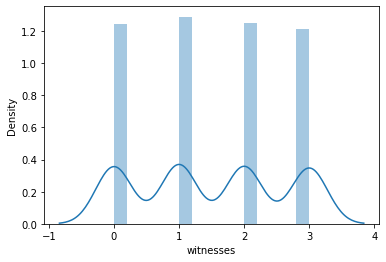



The Distribution Plot for attribute "police_report_available" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


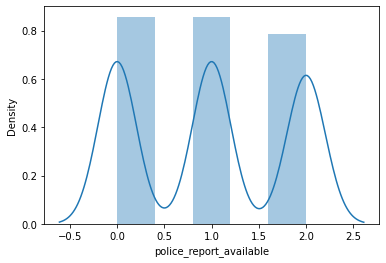



The Distribution Plot for attribute "total_claim_amount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


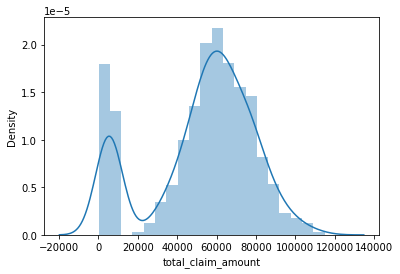



The Distribution Plot for attribute "injury_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


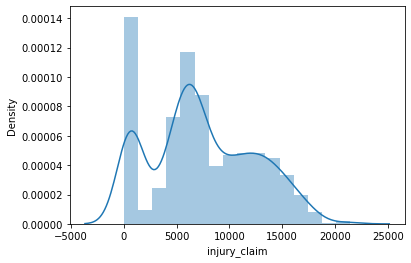



The Distribution Plot for attribute "property_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


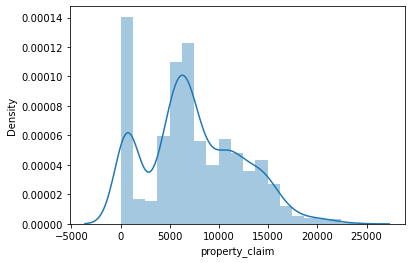



The Distribution Plot for attribute "vehicle_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


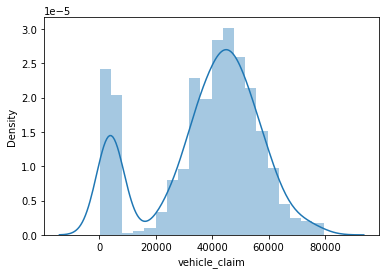



The Distribution Plot for attribute "auto_make" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


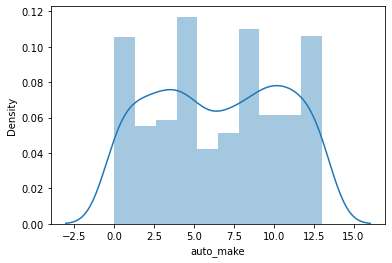



The Distribution Plot for attribute "auto_model" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


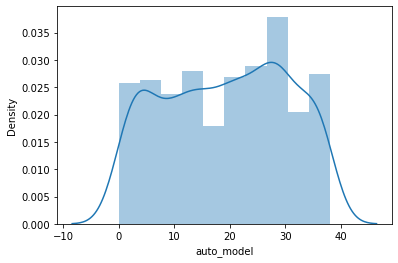



The Distribution Plot for attribute "auto_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


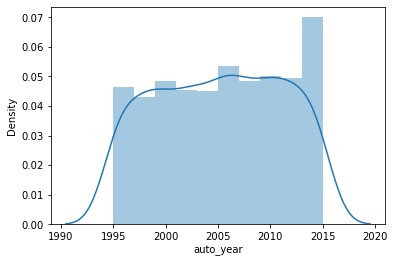



The Distribution Plot for attribute "fraud_reported" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


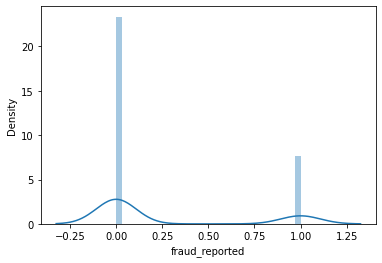

In [45]:
for i in df.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side

# Outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [47]:
print(z.iloc[31,8])
print(z.iloc[975,8])
print(z.iloc[248,7])

3.2027365291952488
3.734717039665355
3.372637026807583


# Boxplots To check the Outliers

The Box-Plot for attribute "months_as_customer" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


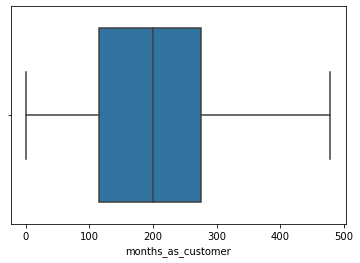



The Box-Plot for attribute "age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


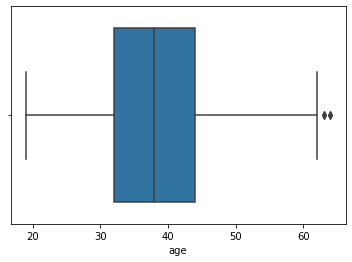



The Box-Plot for attribute "policy_number" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


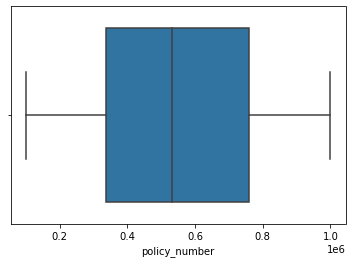



The Box-Plot for attribute "policy_bind_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


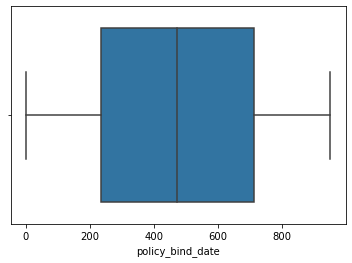



The Box-Plot for attribute "policy_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


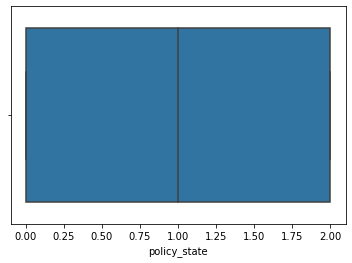



The Box-Plot for attribute "policy_csl" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


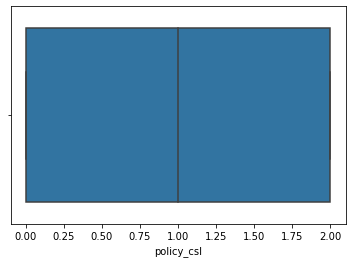



The Box-Plot for attribute "policy_deductable" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


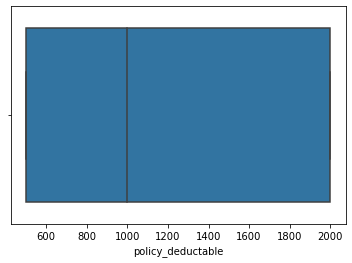



The Box-Plot for attribute "policy_annual_premium" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


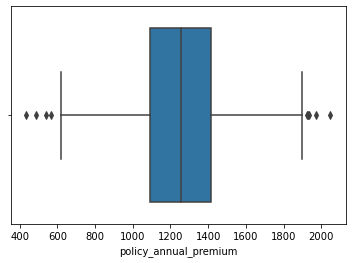



The Box-Plot for attribute "umbrella_limit" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


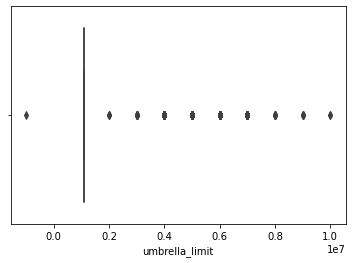



The Box-Plot for attribute "insured_zip" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


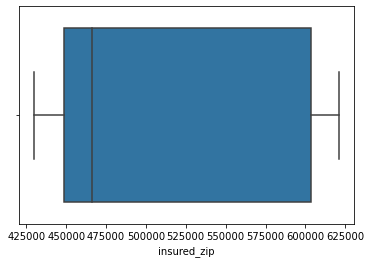



The Box-Plot for attribute "insured_sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


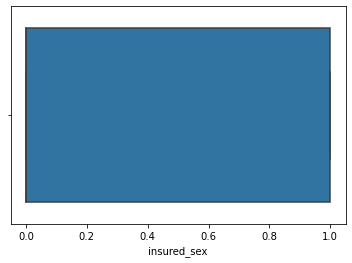



The Box-Plot for attribute "insured_education_level" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


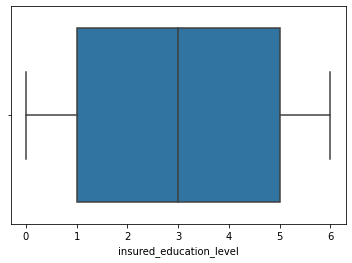



The Box-Plot for attribute "insured_occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


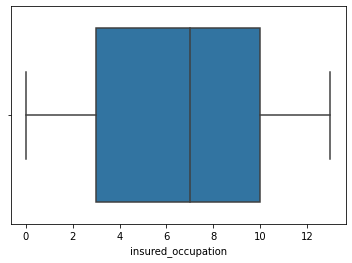



The Box-Plot for attribute "insured_hobbies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


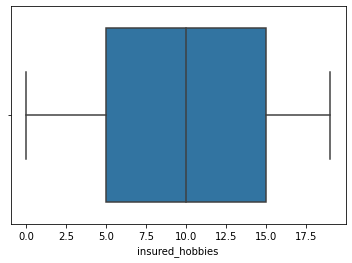



The Box-Plot for attribute "insured_relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


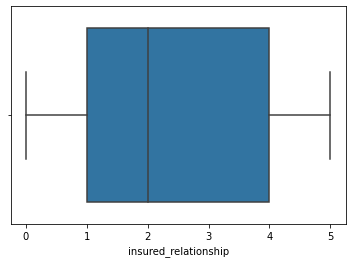



The Box-Plot for attribute "capital-gains" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


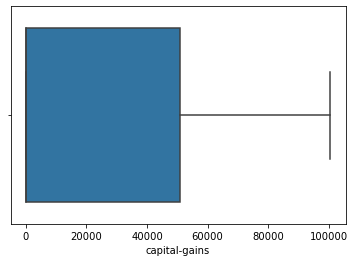



The Box-Plot for attribute "capital-loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


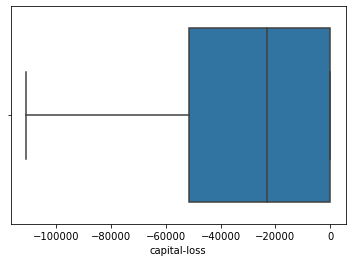



The Box-Plot for attribute "incident_date" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


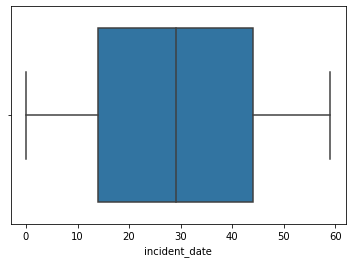



The Box-Plot for attribute "incident_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


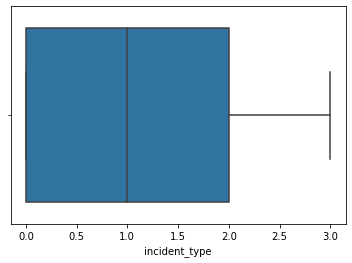



The Box-Plot for attribute "collision_type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


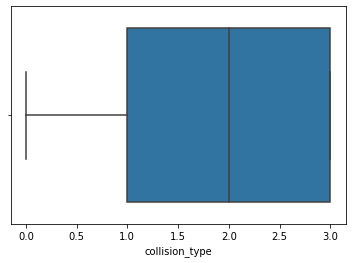



The Box-Plot for attribute "incident_severity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


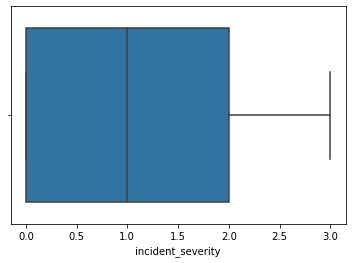



The Box-Plot for attribute "authorities_contacted" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


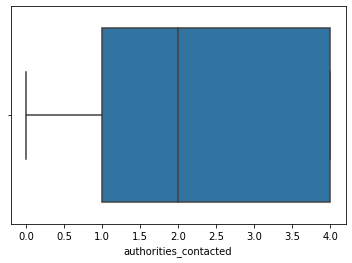



The Box-Plot for attribute "incident_state" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


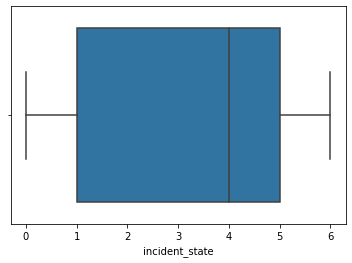



The Box-Plot for attribute "incident_city" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


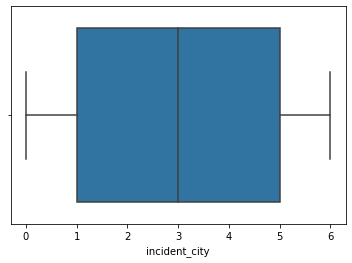



The Box-Plot for attribute "incident_location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


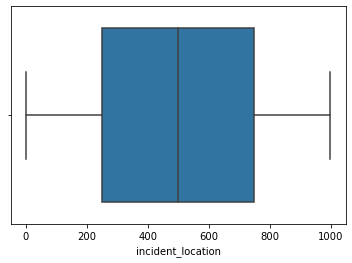



The Box-Plot for attribute "incident_hour_of_the_day" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


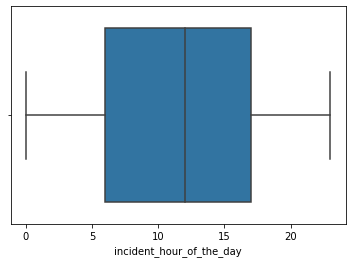



The Box-Plot for attribute "number_of_vehicles_involved" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


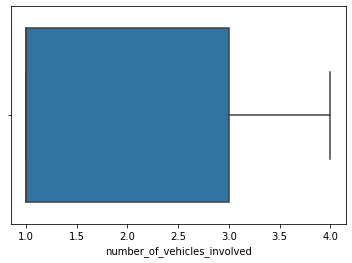



The Box-Plot for attribute "property_damage" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


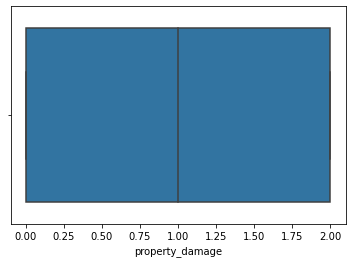



The Box-Plot for attribute "bodily_injuries" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


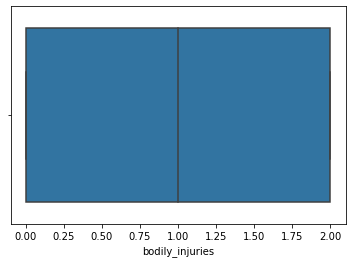



The Box-Plot for attribute "witnesses" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


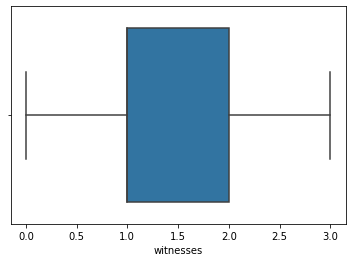



The Box-Plot for attribute "police_report_available" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


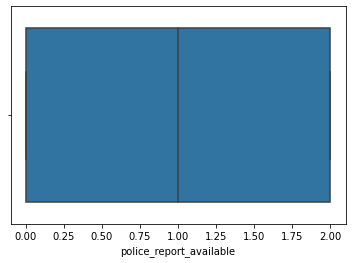



The Box-Plot for attribute "total_claim_amount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


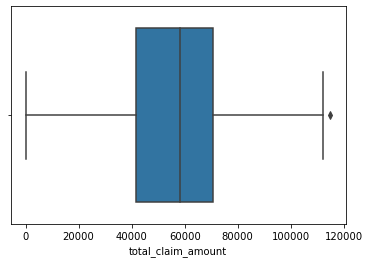



The Box-Plot for attribute "injury_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


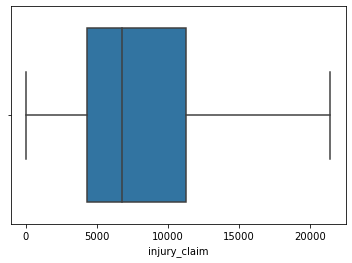



The Box-Plot for attribute "property_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


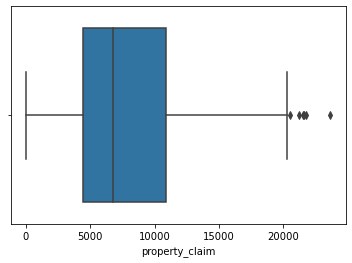



The Box-Plot for attribute "vehicle_claim" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


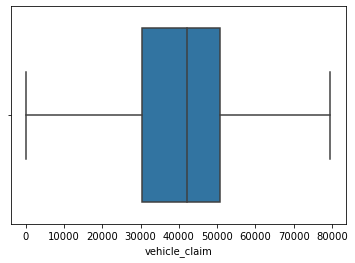



The Box-Plot for attribute "auto_make" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


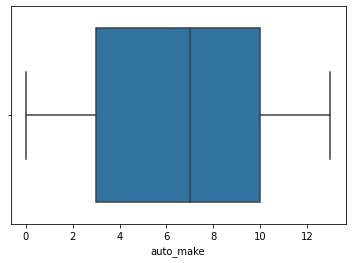



The Box-Plot for attribute "auto_model" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


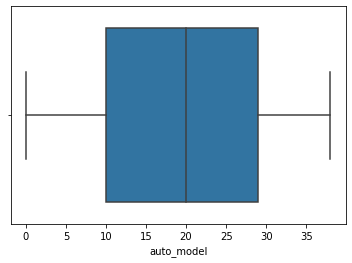



The Box-Plot for attribute "auto_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


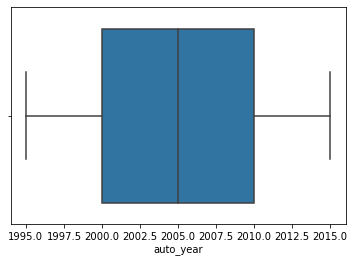



The Box-Plot for attribute "fraud_reported" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


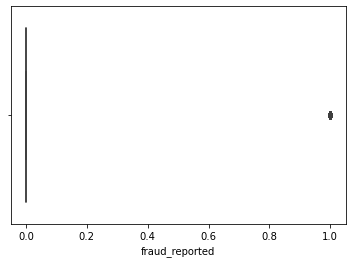

In [48]:
for i in df.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

# Data Cleansing

# 1.Remove Negative Correlation

In [49]:
# drop all the negative columns and correlation value close too zero as well
df1=df.drop(['incident_severity','incident_state','incident_type','insured_hobbies','authorities_contacted','incident_city','policy_csl','property_damage','policy_number','police_report_available','incident_date','auto_make','capital-gains','capital-loss','policy_annual_premium','incident_location','auto_model','insured_occupation','incident_hour_of_the_day','auto_year','insured_education_level'],axis=1)
df1

months_as_customer  age  policy_bind_date  policy_state  \
0                   328   48               532             2   
1                   228   42               821             1   
2                   134   29               186             2   
3                   256   41               766             0   
4                   228   44               181             0   
..                  ...  ...               ...           ...   
995                   3   38               487             2   
996                 285   41               129             0   
997                 130   34               509             2   
998                 458   62               573             0   
999                 456   60               359             2   

     policy_deductable  umbrella_limit  insured_zip  insured_sex  \
0                 1000         1101000       466132            1   
1                 2000         5000000       468176            1   
2                 2000         5000000       430632            0   
3                 2000         6000000       608117            0   
4                 1000         6000000       610706            1   
..                 ...             ...          ...          ...   
995               1000         1101000       431289            0   
996               1000         1101000       608177            0   
997                500         3000000       442797            0   
998               2000         5000000       441714            1   
999               1000         1101000       612260            0   

     insured_relationship  collision_type  number_of_vehicles_involved  \
0                       0               3                            1   
1                       2               0                            1   
2                       3               2                            3   
3                       4               1                            1   
4                       4               0                            1   
..                    ...             ...                          ...   
995                     4               1                            1   
996                     5               2                            1   
997                     2               3                            3   
998                     5               2                            1   
999                     0               0                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  fraud_reported  
0             13020          52080               1  
1               780           3510               1  
2              3850          23100               0  
3              6340          50720               1  
4               650           4550               0  
..              ...            ...             ...  
995            8720          61040               0  
996           18080          72320               0  
997            7500          52500               0  
998            5220          36540               0  
999             920           3680               0  

[1000 rows x 18 columns]

# 2.Removing Multicollinearity

In [50]:
x=df1.iloc[:,0:-1]
x

months_as_customer  age  policy_bind_date  policy_state  \
0                   328   48               532             2   
1                   228   42               821             1   
2                   134   29               186             2   
3                   256   41               766             0   
4                   228   44               181             0   
..                  ...  ...               ...           ...   
995                   3   38               487             2   
996                 285   41               129             0   
997                 130   34               509             2   
998                 458   62               573             0   
999                 456   60               359             2   

     policy_deductable  umbrella_limit  insured_zip  insured_sex  \
0                 1000         1101000       466132            1   
1                 2000         5000000       468176            1   
2                 2000         5000000       430632            0   
3                 2000         6000000       608117            0   
4                 1000         6000000       610706            1   
..                 ...             ...          ...          ...   
995               1000         1101000       431289            0   
996               1000         1101000       608177            0   
997                500         3000000       442797            0   
998               2000         5000000       441714            1   
999               1000         1101000       612260            0   

     insured_relationship  collision_type  number_of_vehicles_involved  \
0                       0               3                            1   
1                       2               0                            1   
2                       3               2                            3   
3                       4               1                            1   
4                       4               0                            1   
..                    ...             ...                          ...   
995                     4               1                            1   
996                     5               2                            1   
997                     2               3                            3   
998                     5               2                            1   
999                     0               0                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  
0             13020          52080  
1               780           3510  
2              3850          23100  
3              6340          50720  
4               650           4550  
..              ...            ...  
995            8720          61040  
996           18080          72320  
997            7500          52500  
998            5220          36540  
999             920           3680  

[1000 rows x 17 columns]

In [51]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [53]:
vif()

                       Features  VIF_Score
0            months_as_customer  20.410282
1                           age  81.664946
2              policy_bind_date   3.893350
3                  policy_state   2.486001
4             policy_deductable   4.429376
5                umbrella_limit   2.120530
6                   insured_zip  29.924368
7                   insured_sex   1.877565
8          insured_relationship   3.078314
9                collision_type   5.704962
10  number_of_vehicles_involved   4.871491
11              bodily_injuries   2.457448
12                    witnesses   2.820983
13           total_claim_amount        inf
14                 injury_claim        inf
15               property_claim        inf
16                vehicle_claim        inf


# 3.Removing Outliers

In [54]:
df3=df1[(z<3).all(axis=1)]
df3

months_as_customer  age  policy_bind_date  policy_state  \
0                   328   48               532             2   
1                   228   42               821             1   
2                   134   29               186             2   
3                   256   41               766             0   
4                   228   44               181             0   
..                  ...  ...               ...           ...   
995                   3   38               487             2   
996                 285   41               129             0   
997                 130   34               509             2   
998                 458   62               573             0   
999                 456   60               359             2   

     policy_deductable  umbrella_limit  insured_zip  insured_sex  \
0                 1000         1101000       466132            1   
1                 2000         5000000       468176            1   
2                 2000         5000000       430632            0   
3                 2000         6000000       608117            0   
4                 1000         6000000       610706            1   
..                 ...             ...          ...          ...   
995               1000         1101000       431289            0   
996               1000         1101000       608177            0   
997                500         3000000       442797            0   
998               2000         5000000       441714            1   
999               1000         1101000       612260            0   

     insured_relationship  collision_type  number_of_vehicles_involved  \
0                       0               3                            1   
1                       2               0                            1   
2                       3               2                            3   
3                       4               1                            1   
4                       4               0                            1   
..                    ...             ...                          ...   
995                     4               1                            1   
996                     5               2                            1   
997                     2               3                            3   
998                     5               2                            1   
999                     0               0                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  fraud_reported  
0             13020          52080               1  
1               780           3510               1  
2              3850          23100               0  
3              6340          50720               1  
4               650           4550               0  
..              ...            ...             ...  
995            8720          61040               0  
996           18080          72320               0  
997            7500          52500               0  
998            5220          36540               0  
999             920           3680               0  

[980 rows x 18 columns]

In [55]:
print(df1.shape)
print(df3.shape)

(1000, 18)
(980, 18)


In [56]:
percentage_loss=(1000-980)*100/1000
percentage_loss

2.0

since the threshold value I'm considering for the outliers is 10% and I'm getting the loss percentage here as 2% which is ofcourse on a lower side,hence will remove the outliers

# 4.Removing Skewness

In [57]:
import sklearn
from sklearn.preprocessing import power_transform

In [58]:
x=df3.drop('fraud_reported',axis=1)
x

months_as_customer  age  policy_bind_date  policy_state  \
0                   328   48               532             2   
1                   228   42               821             1   
2                   134   29               186             2   
3                   256   41               766             0   
4                   228   44               181             0   
..                  ...  ...               ...           ...   
995                   3   38               487             2   
996                 285   41               129             0   
997                 130   34               509             2   
998                 458   62               573             0   
999                 456   60               359             2   

     policy_deductable  umbrella_limit  insured_zip  insured_sex  \
0                 1000         1101000       466132            1   
1                 2000         5000000       468176            1   
2                 2000         5000000       430632            0   
3                 2000         6000000       608117            0   
4                 1000         6000000       610706            1   
..                 ...             ...          ...          ...   
995               1000         1101000       431289            0   
996               1000         1101000       608177            0   
997                500         3000000       442797            0   
998               2000         5000000       441714            1   
999               1000         1101000       612260            0   

     insured_relationship  collision_type  number_of_vehicles_involved  \
0                       0               3                            1   
1                       2               0                            1   
2                       3               2                            3   
3                       4               1                            1   
4                       4               0                            1   
..                    ...             ...                          ...   
995                     4               1                            1   
996                     5               2                            1   
997                     2               3                            3   
998                     5               2                            1   
999                     0               0                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  
0             13020          52080  
1               780           3510  
2              3850          23100  
3              6340          50720  
4               650           4550  
..              ...            ...  
995            8720          61040  
996           18080          72320  
997            7500          52500  
998            5220          36540  
999             920           3680  

[980 rows x 17 columns]

In [59]:
y=df3.fraud_reported
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [60]:
x=power_transform(x)
x

array([[ 1.04454111,  1.0023305 ,  0.29902129, ...,  0.00858172,
         1.08980208,  0.7581298 ],
       [ 0.29904549,  0.42717141,  1.1824092 , ..., -1.52209542,
        -1.5637232 , -1.78748531],
       [-0.51581942, -1.13601305, -0.99804174, ...,  0.22617755,
        -0.58207486, -0.82024583],
       ...,
       [-0.55427228, -0.47059792,  0.22317302, ...,  0.1906937 ,
         0.18625419,  0.78172811],
       [ 1.90408801,  2.12107486,  0.43183104, ..., -0.24807391,
        -0.26790911, -0.10201672],
       [ 1.89156317,  1.97656406, -0.30029896, ..., -1.69309349,
        -1.49907329, -1.77993883]])

# Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04454111,  1.0023305 ,  0.29902129, ...,  0.00858172,
         1.08980208,  0.7581298 ],
       [ 0.29904549,  0.42717141,  1.1824092 , ..., -1.52209542,
        -1.5637232 , -1.78748531],
       [-0.51581942, -1.13601305, -0.99804174, ...,  0.22617755,
        -0.58207486, -0.82024583],
       ...,
       [-0.55427228, -0.47059792,  0.22317302, ...,  0.1906937 ,
         0.18625419,  0.78172811],
       [ 1.90408801,  2.12107486,  0.43183104, ..., -0.24807391,
        -0.26790911, -0.10201672],
       [ 1.89156317,  1.97656406, -0.30029896, ..., -1.69309349,
        -1.49907329, -1.77993883]])

In [62]:
x.mean()

4.9047067594484705e-18

In [64]:
x.std()

0.970142500145332

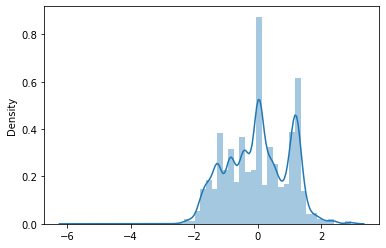

In [65]:
sns.distplot(x)
plt.show()

Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

# Principle Component Analysis(PCA)

In [66]:
#reducing the dimension to 5 components
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[-1.5425221 ,  1.26004559, -1.47270378,  0.13776734,  0.18733562],
       [ 3.78449623,  0.92878897,  0.07623401, -0.22002846, -1.76094158],
       [ 0.64847569, -1.10662186,  1.04821495,  2.8216223 ,  0.41677732],
       ...,
       [-1.40678267, -0.90560119,  0.47617399,  0.48583126,  0.5695226 ],
       [ 0.32645045,  3.20900809,  1.15419051,  0.28694735, -1.89708191],
       [ 3.66689339,  2.71727927, -2.04251866,  0.51320156,  1.16647624]])

# Plotting the Relationship b/w Principle Components

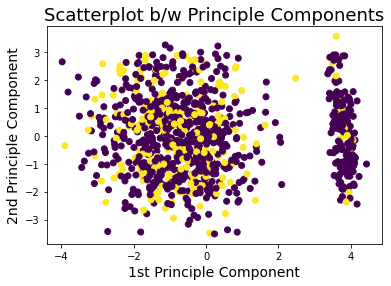

In [67]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.ylabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

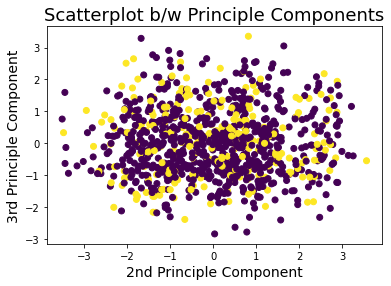

In [68]:
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.ylabel('3rd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

Above two diagrams tells us that our feature variables are distributed and mixed well that's a good sign going forward

# Using IMBlearn Balancing Techniques

In [69]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [71]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [72]:
print(x.shape)
print(y.shape)

(1480, 5)
(1480,)


# Training_Testing Phase

In [73]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
lr=LogisticRegression()

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{6} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-6 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.5760135135135135
Testing accuracy of the model is	 0.5878378378378378
Confusion Matrix for the model is
 [[78 56]
 [66 96]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.54      0.58      0.56       134
           1       0.63      0.59      0.61       162

    accuracy                           0.59       296
   macro avg       0.59      0.59      0.59       296
weighted avg       0.59      0.59      0.59       296



# CV Score

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
for i in range(2,7):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.575 and standard deviation is 0.010135135135135143

At K-Fold 3 the CV Score of the logistic model is 0.5831177647661047 and standard deviation is 0.015379602338073744

At K-Fold 4 the CV Score of the logistic model is 0.5689189189189189 and standard deviation is 0.01777425194319715

At K-Fold 5 the CV Score of the logistic model is 0.5743243243243243 and standard deviation is 0.03398588199989

At K-Fold 6 the CV Score of the logistic model is 0.5770629669859452 and standard deviation is 0.02790486068723641



In [77]:
cvs=cross_val_score(lr,x,y,cv=5)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 3 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 3 the CV Score of the logistic model is 0.5743243243243243 and standard deviation is 0.03398588199989



In [78]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

In [79]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,5):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.5760135135135135
Testing_Accuracy_Score= 0.5878378378378378

 Classification Report-
               precision    recall  f1-score   support

           0       0.58      0.54      0.56       144
           1       0.59      0.63      0.61       152

    accuracy                           0.59       296
   macro avg       0.59      0.59      0.59       296
weighted avg       0.59      0.59      0.59       296


 Confusion Metrix-
 [[78 66]
 [56 96]]


AUC_ROC CURVE


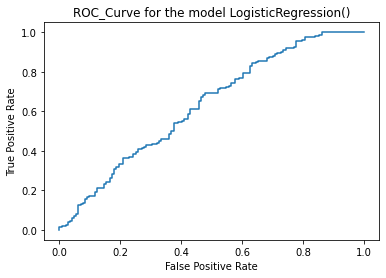

ROC AUC SCORE is- 0.5866228070175439


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.575


At the K-Fold 3 the CV score of model LogisticRegression() is 0.5831177647661047


At the K-Fold 4 the CV score of model LogisticRegression() is 0.5689189189189189




In [80]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.597972972972973
Testing_Accuracy_Score= 0.6114864864864865

 Classification Report-
               precision    recall  f1-score   support

           0       0.67      0.39      0.49       144
           1       0.59      0.82      0.68       152

    accuracy                           0.61       296
   macro avg       0.63      0.61      0.59       296
weighted avg       0.63      0.61      0.59       296


 Confusion Metrix-
 [[ 56  88]
 [ 27 125]]


AUC_ROC CURVE


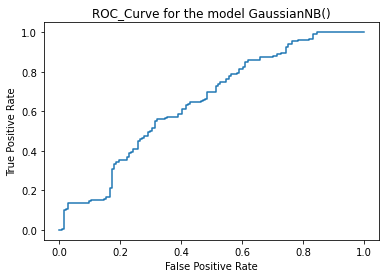

ROC AUC SCORE is- 0.6056286549707601


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5952702702702704


At the K-Fold 3 the CV score of model GaussianNB() is 0.6047238943043363


At the K-Fold 4 the CV score of model GaussianNB() is 0.595945945945946




In [110]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.808277027027027
Testing_Accuracy_Score= 0.75

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.60      0.70       144
           1       0.70      0.89      0.79       152

    accuracy                           0.75       296
   macro avg       0.77      0.75      0.74       296
weighted avg       0.77      0.75      0.74       296


 Confusion Metrix-
 [[ 86  58]
 [ 16 136]]


AUC_ROC CURVE


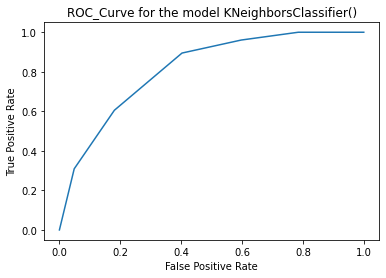

ROC AUC SCORE is- 0.7459795321637427


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6763513513513513


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.7033940757651657


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.7081081081081081




In [82]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6554054054054054

 Classification Report-
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       144
           1       0.67      0.65      0.66       152

    accuracy                           0.66       296
   macro avg       0.66      0.66      0.66       296
weighted avg       0.66      0.66      0.66       296


 Confusion Metrix-
 [[95 49]
 [53 99]]


AUC_ROC CURVE


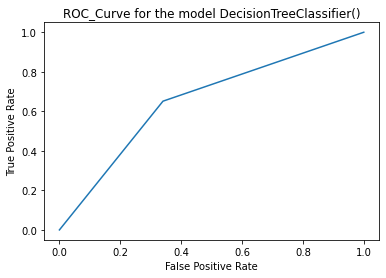

ROC AUC SCORE is- 0.6555190058479532


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.6472972972972972


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.6797294374960651


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.6891891891891893




In [83]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced', max_features='log2')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.793918918918919

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       144
           1       0.79      0.81      0.80       152

    accuracy                           0.79       296
   macro avg       0.79      0.79      0.79       296
weighted avg       0.79      0.79      0.79       296


 Confusion Metrix-
 [[112  32]
 [ 29 123]]


AUC_ROC CURVE


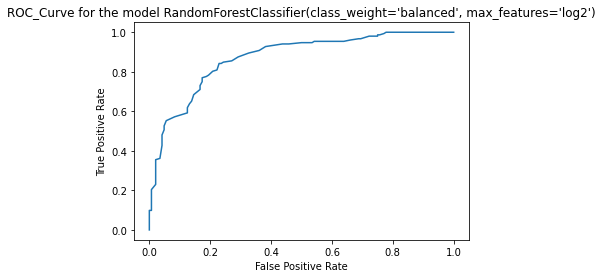

ROC AUC SCORE is- 0.7934941520467836


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.7182432432432433


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.7506891350704737


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.7574324324324324




In [114]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.6942567567567568
Testing_Accuracy_Score= 0.6283783783783784

 Classification Report-
               precision    recall  f1-score   support

           0       0.63      0.57      0.60       144
           1       0.63      0.68      0.65       152

    accuracy                           0.63       296
   macro avg       0.63      0.63      0.63       296
weighted avg       0.63      0.63      0.63       296


 Confusion Metrix-
 [[ 82  62]
 [ 48 104]]


AUC_ROC CURVE


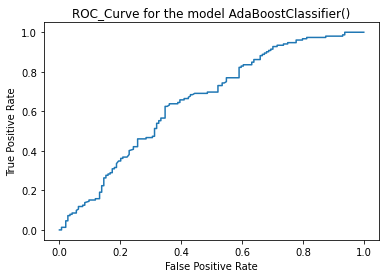

ROC AUC SCORE is- 0.626827485380117


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.6141891891891892


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.6040614486755195


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.6148648648648649




In [85]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.8150337837837838
Testing_Accuracy_Score= 0.6925675675675675

 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.61      0.66       144
           1       0.68      0.77      0.72       152

    accuracy                           0.69       296
   macro avg       0.70      0.69      0.69       296
weighted avg       0.70      0.69      0.69       296


 Confusion Metrix-
 [[ 88  56]
 [ 35 117]]


AUC_ROC CURVE


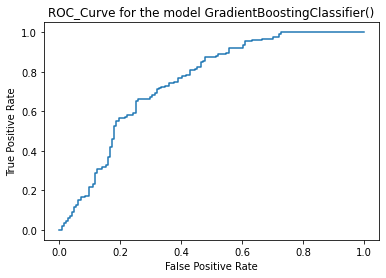

ROC AUC SCORE is- 0.6904239766081872


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.643918918918919


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.6324508024625458


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.6574324324324324




In [86]:
model(grd,x,y)


# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [89]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [90]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [91]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}


In [92]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}


In [93]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [94]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'deviance', 'max_features': 'log2'}


In [116]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='gini',max_features='log2',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced',max_features='log2')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(criterion='squared_error',max_features= 'sqrt')

For model LogisticRegression()
Training_Accuracy_Score= 0.5760135135135135
Testing_Accuracy_Score= 0.5878378378378378

 Classification Report-
               precision    recall  f1-score   support

           0       0.58      0.54      0.56       144
           1       0.59      0.63      0.61       152

    accuracy                           0.59       296
   macro avg       0.59      0.59      0.59       296
weighted avg       0.59      0.59      0.59       296


 Confusion Metrix-
 [[78 66]
 [56 96]]


AUC_ROC CURVE


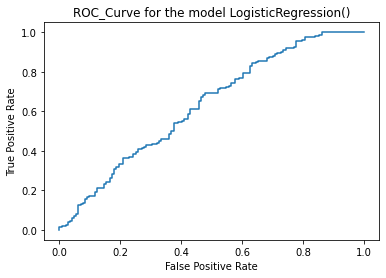

ROC AUC SCORE is- 0.5866228070175439


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.575


At the K-Fold 3 the CV score of model LogisticRegression() is 0.5831177647661047


At the K-Fold 4 the CV score of model LogisticRegression() is 0.5689189189189189




In [96]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.597972972972973
Testing_Accuracy_Score= 0.6114864864864865

 Classification Report-
               precision    recall  f1-score   support

           0       0.67      0.39      0.49       144
           1       0.59      0.82      0.68       152

    accuracy                           0.61       296
   macro avg       0.63      0.61      0.59       296
weighted avg       0.63      0.61      0.59       296


 Confusion Metrix-
 [[ 56  88]
 [ 27 125]]


AUC_ROC CURVE


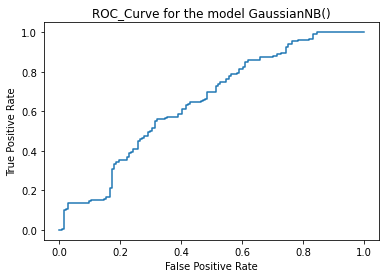

ROC AUC SCORE is- 0.6056286549707601


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5952702702702704


At the K-Fold 3 the CV score of model GaussianNB() is 0.6047238943043363


At the K-Fold 4 the CV score of model GaussianNB() is 0.595945945945946




In [97]:
model(gb,x,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7635135135135135

 Classification Report-
               precision    recall  f1-score   support

           0       0.87      0.60      0.71       144
           1       0.71      0.91      0.80       152

    accuracy                           0.76       296
   macro avg       0.79      0.76      0.76       296
weighted avg       0.79      0.76      0.76       296


 Confusion Metrix-
 [[ 87  57]
 [ 13 139]]


AUC_ROC CURVE


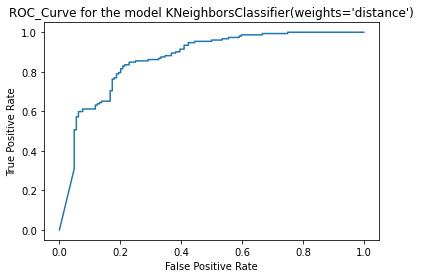

ROC AUC SCORE is- 0.7593201754385965


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.7108108108108109


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.7371788028348293


At the K-Fold 4 the CV score of model KNeighborsClassifier(weights='distance') is 0.7412162162162161




In [98]:
model(neighbor,x,y)

For model DecisionTreeClassifier(max_features='log2')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7128378378378378

 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       144
           1       0.71      0.76      0.73       152

    accuracy                           0.71       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.71      0.71      0.71       296


 Confusion Metrix-
 [[ 96  48]
 [ 37 115]]


AUC_ROC CURVE


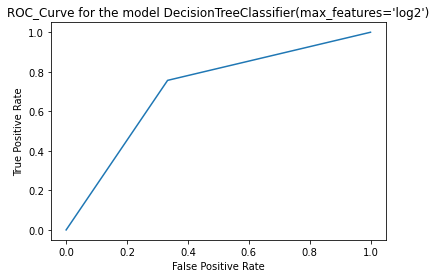

ROC AUC SCORE is- 0.7116228070175439


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.6493243243243243


At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.6932438757996567


At the K-Fold 4 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.6817567567567568




In [99]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced', max_features='log2')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8040540540540541

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       144
           1       0.80      0.83      0.81       152

    accuracy                           0.80       296
   macro avg       0.80      0.80      0.80       296
weighted avg       0.80      0.80      0.80       296


 Confusion Metrix-
 [[112  32]
 [ 26 126]]


AUC_ROC CURVE


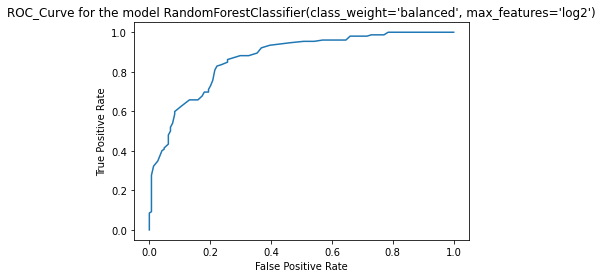

ROC AUC SCORE is- 0.8033625730994152


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.727027027027027


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.7533854530224766


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', max_features='log2') is 0.7716216216216216




In [115]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.6942567567567568
Testing_Accuracy_Score= 0.6283783783783784

 Classification Report-
               precision    recall  f1-score   support

           0       0.63      0.57      0.60       144
           1       0.63      0.68      0.65       152

    accuracy                           0.63       296
   macro avg       0.63      0.63      0.63       296
weighted avg       0.63      0.63      0.63       296


 Confusion Metrix-
 [[ 82  62]
 [ 48 104]]


AUC_ROC CURVE


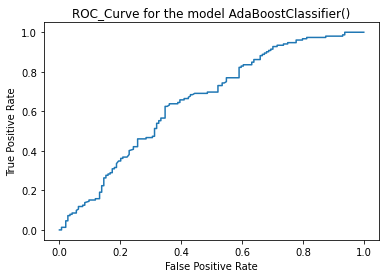

ROC AUC SCORE is- 0.626827485380117


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.6141891891891892


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.6040614486755195


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.6148648648648649




In [102]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt')
Training_Accuracy_Score= 0.8023648648648649
Testing_Accuracy_Score= 0.6756756756756757

 Classification Report-
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       144
           1       0.66      0.74      0.70       152

    accuracy                           0.68       296
   macro avg       0.68      0.67      0.67       296
weighted avg       0.68      0.68      0.67       296


 Confusion Metrix-
 [[ 87  57]
 [ 39 113]]


AUC_ROC CURVE


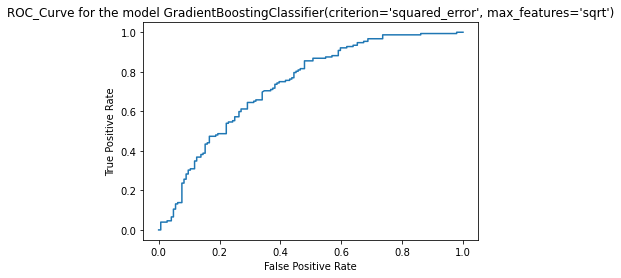

ROC AUC SCORE is- 0.6737938596491229


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.6425675675675676


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.6486601900288246


At the K-Fold 4 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.6493243243243243




In [117]:
model(grd,x,y)

RandomForestClassification model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 78% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 78 % too it means that error are on lower side and ROC_AUC_SCORE is 0.78,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

# Saving the Best Model

In [105]:
import joblib

In [122]:
file='fraud.obj'
joblib.dump(rfc,file)

['fraud.obj']

# Loading the Model

In [123]:
a=joblib.load('fraud.obj')
a

RandomForestClassifier(class_weight='balanced', max_features='log2')

In [126]:
a.fit(x,y)
pred=a.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [127]:
accuracy=accuracy_score(pred,y_test)
accuracy

1.0

# Plotting ROC_AUC_CURVE


The ROC AUC Score is= 1.0


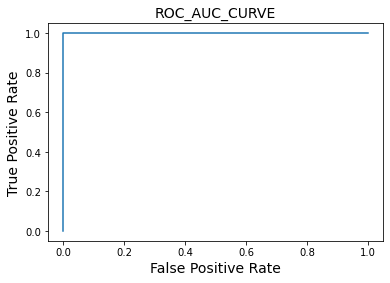

In [128]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

In [129]:
conclusion=pd.DataFrame(data=[pred,y_test],index=['Predicted fraudulent','Original fraudulent'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted fraudulent    0    0    0    1    1    1    0    0    0    1  ...   
Original fraudulent     0    0    0    1    1    1    0    0    0    1  ...   

                      286  287  288  289  290  291  292  293  294  295  
Predicted fraudulent    1    1    0    1    0    1    1    1    0    0  
Original fraudulent     1    1    0    1    0    1    1    1    0    0  

[2 rows x 296 columns]